In [1]:
import numpy as np
import matplotlib.pyplot as plt
from zkrp import *
from scipy import optimize

### 生成interval数据

In [5]:
np.random.seed(0)
n = 100

central = np.append(np.random.normal(0, 1, round(n/4)), np.random.normal(4, 1, round(n*3/4)))
# central = np.random.normal(0, 1, n)

mydata = np.zeros((n, 2))
for i in range(n):
    interval_len = abs(np.random.normal(0, 1, 1))
    mydata[i, 0] = central[i] - interval_len / 2
    mydata[i, 1] = central[i] + interval_len / 2

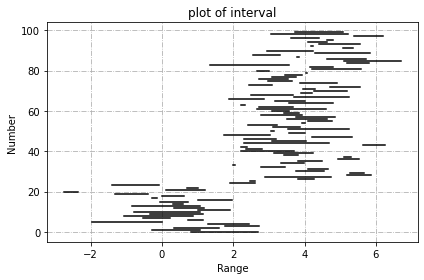

In [6]:
show(mydata, path='./fig/interval data bimodal.jpg')

### 计算平均值并画在图中

In [8]:
result = frechet_mean(mydata, method='hausdorff')
result2 = frechet_mean(mydata, method='middle')

##### 画出两种不同距离度量下的区间分布图

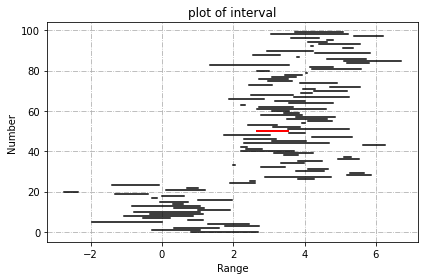

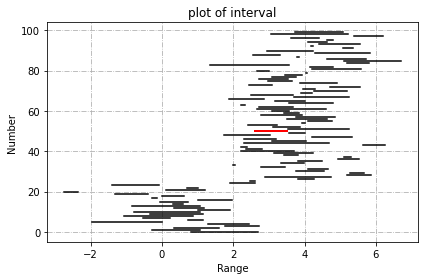

In [9]:
show(mydata, './fig/interval data with mean.jpg', result)
show(mydata, './fig/interval data bimodal with mean3.jpg', result2)

In [11]:
# dsum = result['min_d']
# x = range(len(dsum))
# dsum2 = result2['min_d']
#
# plt.plot(x, dsum, alpha=1, color='red', label='hausdorff')
# plt.plot(x, dsum2, alpha=1, color='blue', label='middle')
# # plt.title('plot of normal distribution middle')  # 折线图标题
# plt.title('plot of bimodal distribution with diff distance')  # 折线图标题

TypeError: object of type 'numpy.float64' has no len()

### 均值区间长度不同情况下的dsum变化画图

100%|██████████| 1000/1000 [00:00<00:00, 1125.03it/s]


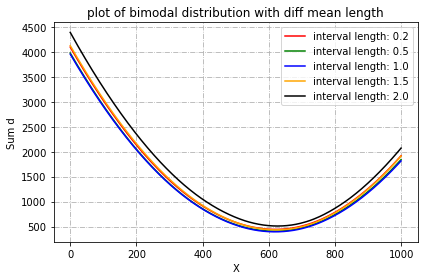

<Figure size 432x288 with 0 Axes>

In [4]:
result_list = []
length = [0.2, 0.5, 1, 1.5, 2]
color = ['red', 'green', 'blue', 'orange', 'black']
for i in range(len(length)):
    result_list.append(frechet_mean(mydata, method='hausdorff', inter_l=length[i]))
    
for i in range(len(length)):
    dsum = result_list[i]['dsum']
    x = range(len(dsum))
    plt.plot(x, dsum, alpha=1, color=color[i], label='interval length: %.1f' % length[i])
    
plt.title('plot of bimodal distribution with diff mean length')  # 折线图标题

plt.xlabel('X')  # x轴标题
plt.ylabel('Sum d')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# plt.savefig('./fig/normal distribution.jpg')
plt.savefig('./fig/bimodal distribution with diff mean length.jpg')

##### 生成测试covaraince的数据

In [2]:
np.random.seed(0)
n = 100

centralx = np.linspace(1,5,n)
centraly = np.linspace(5,1,n)
centralz = np.random.normal(3, 1, n)
centralw = np.square(centralx)
centrals = np.sin(np.linspace(0,2* np.pi, n))
centralss = np.sin(np.linspace(0,2* np.pi, n) + np.pi/4)
centralsss = np.cos(np.linspace(0,2* np.pi, n) + np.pi/4)
centralc = np.cos(np.linspace(0,2* np.pi, n))
centralr = np.append(np.sqrt(25 - pow(np.linspace(1,5,n//2), 2))[::-1], np.sqrt(25 - pow(np.linspace(1,5,n//2), 2)))

mydatax = np.zeros((n, 2))
interval_lenx = abs(np.random.normal(0, 1, n))
mydatax[:, 0] = centralx - interval_lenx / 2
mydatax[:, 1] = centralx + interval_lenx / 2

### 区间长度反向
mydataxx = np.zeros((n, 2))
interval_lenxx = interval_lenx[::-1]
mydataxx[:, 0] = centralx - interval_lenxx / 2
mydataxx[:, 1] = centralx + interval_lenxx / 2

### 区间长度正排序
mydataxxx = np.zeros((n, 2))
interval_lenxxx = np.sort(interval_lenx)
mydataxxx[:, 0] = centralx - interval_lenxxx / 2
mydataxxx[:, 1] = centralx + interval_lenxxx / 2

### 区间长度逆排序
mydataxxxx = np.zeros((n, 2))
interval_lenxxxx = np.sort(interval_lenx)[::-1]
mydataxxxx[:, 0] = centralx - interval_lenxxxx / 2
mydataxxxx[:, 1] = centralx + interval_lenxxxx / 2

mydatay = np.zeros((n, 2))
interval_leny = abs(np.random.normal(0, 1, n))
mydatay[:, 0] = centraly - interval_lenx / 2
mydatay[:, 1] = centraly + interval_lenx / 2

mydatayy = np.zeros((n, 2))
interval_lenyy = np.sort(interval_lenx)[::-1]
mydatayy[:, 0] = centraly - interval_lenyy / 2
mydatayy[:, 1] = centraly + interval_lenyy / 2

mydataz = np.zeros((n, 2))
interval_lenz = abs(np.random.normal(0, 1, n))
mydataz[:, 0] = centralz - interval_lenz / 2
mydataz[:, 1] = centralz + interval_lenz / 2

mydatazz = np.zeros((n, 2))
interval_lenzz = np.sort(interval_lenx)
mydatazz[:, 0] = centralz - interval_lenzz / 2
mydatazz[:, 1] = centralz + interval_lenzz / 2

mydataw = np.zeros((n, 2))
interval_lenw = abs(np.random.normal(0, 1, n))
mydataw[:, 0] = centralw - interval_lenw / 2
mydataw[:, 1] = centralw + interval_lenw / 2

mydatas = np.zeros((n, 2))
interval_lens = abs(np.random.normal(0, 1, n))
mydatas[:, 0] = centrals - interval_lens / 2
mydatas[:, 1] = centrals + interval_lens / 2

mydatass = np.zeros((n, 2))
interval_lenss = abs(np.random.normal(0, 1, n))
mydatass[:, 0] = centralss - interval_lenss / 2
mydatass[:, 1] = centralss + interval_lenss / 2

mydatasss = np.zeros((n, 2))
interval_lensss = abs(np.random.normal(0, 1, n))
mydatasss[:, 0] = centralsss - interval_lensss / 2
mydatasss[:, 1] = centralsss + interval_lensss / 2

mydatac = np.zeros((n, 2))
interval_lenc = abs(np.random.normal(0, 1, n))
mydatac[:, 0] = centralc - interval_lenc / 2
mydatac[:, 1] = centralc + interval_lenc / 2

mydatar = np.zeros((n, 2))
interval_lenr = abs(np.random.normal(0, 1, n))
mydatar[:, 0] = centralr - interval_lenr / 2
mydatar[:, 1] = centralr + interval_lenr / 2

mydataxp = np.zeros((n, 2))
interval_lenxp = abs(np.random.normal(0, 1, n)) * 2
mydataxp[:, 0] = centralx - interval_lenxp / 2
mydataxp[:, 1] = centralx + interval_lenxp / 2

mydatawp = np.zeros((n, 2))
interval_lenwp = abs(np.random.normal(0, 1, n)) * 2
mydatawp[:, 0] = centralw - interval_lenwp / 2
mydatawp[:, 1] = centralw + interval_lenwp / 2

mydataxpp = np.zeros((n, 2))
interval_lenxpp = abs(np.random.normal(0, 1, n)) * 4
mydataxpp[:, 0] = centralx - interval_lenxpp / 2
mydataxpp[:, 1] = centralx + interval_lenxpp / 2

mydatawpp = np.zeros((n, 2))
interval_lenwpp = abs(np.random.normal(0, 1, n)) * 4
mydatawpp[:, 0] = centralw - interval_lenwpp / 2
mydatawpp[:, 1] = centralw + interval_lenwpp / 2

In [23]:
### 存为csv文件

np.savetxt("data/mydatax.csv", mydatax, delimiter=',')
np.savetxt("data/mydatay.csv", mydatay, delimiter=',')
np.savetxt("data/mydataz.csv", mydataz, delimiter=',')
np.savetxt("data/mydataxx.csv", mydataxx, delimiter=',')
np.savetxt("data/mydataxxx.csv", mydataxxx, delimiter=',')
np.savetxt("data/mydataxxxx.csv", mydataxxxx, delimiter=',')
np.savetxt("data/mydatayy.csv", mydatayy, delimiter=',')
np.savetxt("data/mydataz.csv", mydataz, delimiter=',')
np.savetxt("data/mydatazz.csv", mydatazz, delimiter=',')
np.savetxt("data/mydataw.csv", mydataw, delimiter=',')
np.savetxt("data/mydatas.csv", mydatas, delimiter=',')
np.savetxt("data/mydatass.csv", mydatass, delimiter=',')
np.savetxt("data/mydatasss.csv", mydatasss, delimiter=',')
np.savetxt("data/mydatac.csv", mydatac, delimiter=',')
np.savetxt("data/mydatar.csv", mydatar, delimiter=',')
np.savetxt("data/mydataxp.csv", mydataxp, delimiter=',')
np.savetxt("data/mydatawp.csv", mydatawp, delimiter=',')
np.savetxt("data/mydataxpp.csv", mydataxpp, delimiter=',')
np.savetxt("data/mydatawpp.csv", mydatawpp, delimiter=',')

#### 检查variance 和 covariance 对同一变量的的一致性

In [3]:
print(frechet_variance(mydatax))
print(frechet_covariance(mydatax,mydatax))

 19%|█▉        | 19/100 [00:00<00:00, 184.30it/s]

1.9042090900688846


100%|██████████| 100/100 [00:00<00:00, 189.39it/s]

1.9042090900688846


#### 对于中心点排列完全相反的两个数据 x 和 y 以及 x 和 中心点随机的 z

In [ ]:
plt.plot(centralx,centraly)

In [4]:
cov_x_y = frechet_covariance(mydatax,mydatay)
print(cov_x_y)
print(pow(cov_x_y,2)/frechet_variance(mydatax)/frechet_variance(mydatay))

100%|██████████| 100/100 [00:00<00:00, 208.58it/s]

-1.1436528790426013
0.3607108344997724


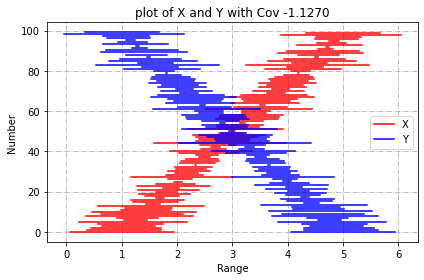

In [6]:
show2(mydatax, mydatay, path='./fig/data x and y.jpg', Cov=cov_x_y)

100%|██████████| 100/100 [00:00<00:00, 197.03it/s]


-0.08955062175670753
0.002211606934800008


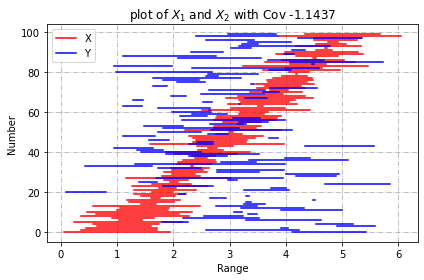

In [5]:
cov_x_z = frechet_covariance(mydatax,mydataz)
print(cov_x_z)
print(pow(cov_x_z,2)/frechet_variance(mydatax)/frechet_variance(mydatay))
show2(mydatax, mydataz, path='./fig/data x and y.jpg', Cov=cov_x_y)


#### 研究中心点排列完全一致时，每个数据区间长度的影响
x: 原始数据，区间长度随机
xx: 和原始数据区间长度反向
xxx: 对原始数据区间长度正序排列
xxxx: 对原始数据区间长度逆序排列

100%|██████████| 1000/1000 [00:01<00:00, 755.61it/s]


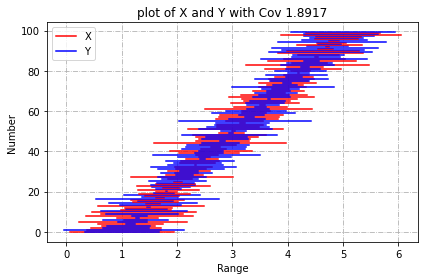

100%|██████████| 1000/1000 [00:01<00:00, 738.47it/s]


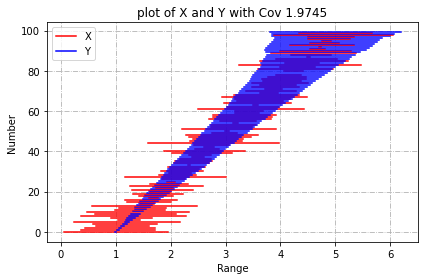

100%|██████████| 1000/1000 [00:01<00:00, 727.16it/s]


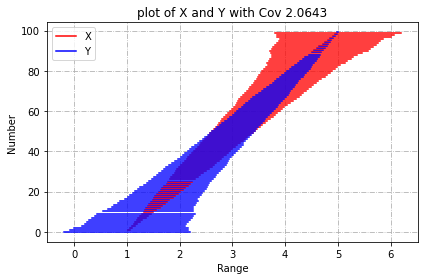

100%|██████████| 1000/1000 [00:01<00:00, 719.16it/s]


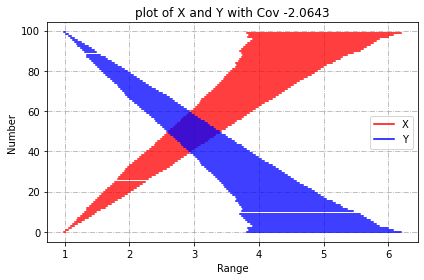

In [12]:
cov_x_xx = frechet_covariance(mydatax, mydataxx)
show2(mydatax, mydataxx, path='./fig/data x and xx.jpg', Cov=cov_x_xx)

cov_x_xxx = frechet_covariance(mydatax, mydataxxx)
show2(mydatax, mydataxxx, path='./fig/data x and xxx.jpg', Cov=cov_x_xxx)

cov_xxx_xxxx = frechet_covariance(mydataxxx, mydataxxxx)
show2(mydataxxx, mydataxxxx, path='./fig/data xxx and xxxx.jpg', Cov=cov_xxx_xxxx)

cov_xxx_yy = frechet_covariance(mydataxxx, mydatayy)
show2(mydataxxx, mydatayy, path='./fig/data xxx and yy.jpg', Cov=cov_xxx_yy)

### Cov2 尝试

In [6]:
print(frechet_variance(mydatax))
print(frechet_covariance(mydatax,mydatax))

 20%|██        | 20/100 [00:00<00:00, 190.30it/s]

1.9042090900688846


100%|██████████| 100/100 [00:00<00:00, 193.25it/s]

1.9042090900688846


In [7]:
cov_x_y = frechet_covariance(mydatax,mydatay)
print(cov_x_y)
print(pow(cov_x_y,2)/frechet_variance(mydatax)/frechet_variance(mydatay))

# show2(mydatax, mydatay, path='./fig/data x and y 2.jpg', Cov=cov_x_y)

100%|██████████| 100/100 [00:00<00:00, 202.61it/s]

-1.1436528790426013
0.3607108344997724


In [8]:
cov_x_z = frechet_covariance(mydatax,mydataz)
print(cov_x_z)
# show2(mydatax, mydataz, path='./fig/data x and z 2.jpg', Cov=cov_x_z)

100%|██████████| 100/100 [00:00<00:00, 195.70it/s]

-0.08955062175670753


100%|██████████| 100/100 [00:00<00:00, 188.86it/s]


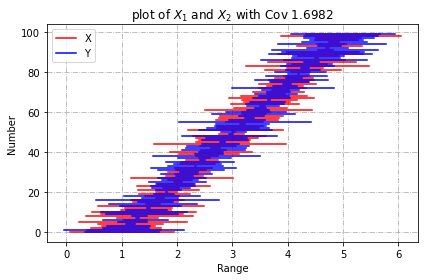

 20%|██        | 20/100 [00:00<00:00, 195.90it/s]C:\Users\kangxinlai\anaconda3\lib\site-packages\scipy\optimize\optimize.py:3262: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Jout = np.array(list(mapper(wrapped_func, grid)))
100%|██████████| 100/100 [00:00<00:00, 200.40it/s]


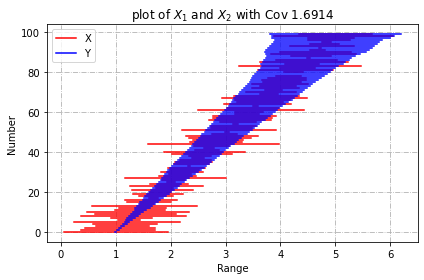

 21%|██        | 21/100 [00:00<00:00, 201.74it/s]C:\Users\kangxinlai\anaconda3\lib\site-packages\scipy\optimize\optimize.py:3262: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Jout = np.array(list(mapper(wrapped_func, grid)))
100%|██████████| 100/100 [00:00<00:00, 202.24it/s]


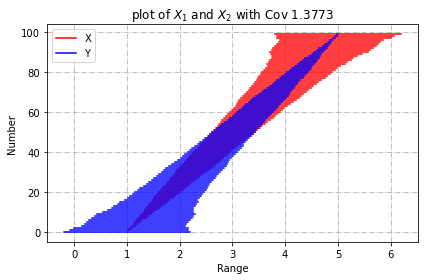

In [7]:
cov_x_xx = frechet_covariance(mydatax, mydataxx)
show2(mydatax, mydataxx, path='./fig/data x and xx 2.jpg', Cov=cov_x_xx)

cov_x_xxx = frechet_covariance(mydatax, mydataxxx)
show2(mydatax, mydataxxx, path='./fig/data x and xxx 2.jpg', Cov=cov_x_xxx)

cov_xxx_xxxx = frechet_covariance(mydataxxx, mydataxxxx)
show2(mydataxxx, mydataxxxx, path='./fig/data xxx and xxxx 2.jpg', Cov=cov_xxx_xxxx)


 22%|██▏       | 22/100 [00:00<00:00, 214.42it/s]C:\Users\kangxinlai\anaconda3\lib\site-packages\scipy\optimize\optimize.py:3262: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Jout = np.array(list(mapper(wrapped_func, grid)))
100%|██████████| 100/100 [00:00<00:00, 204.50it/s]


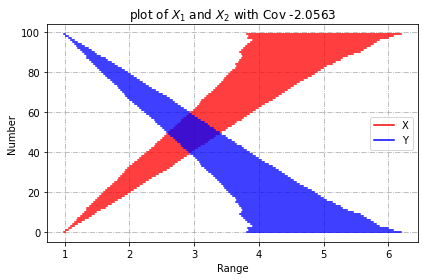

In [8]:
cov_xxx_yy = frechet_covariance(mydataxxx, mydatayy)
show2(mydataxxx, mydatayy, path='./fig/data xxx and yy 2.jpg', Cov=cov_xxx_yy)

In [9]:
print(pow(cov_xxx_yy,2)/frechet_variance(mydataxxx)/frechet_variance(mydatayy))

0.9951634639045348


### 三种 cor 比较 1: hausdorff 2:wasserstein 3:symbolic

In [9]:
print(frechet_correlation(mydatax, mydatay))
# print(frechet_correlation(mydatax, mydatay, method='wasserstein'))
print(frechet_correlation(mydatax, mydatay, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 207.28it/s]

-0.6005920699607783
-0.8761803075570778


In [5]:
print(frechet_correlation(mydatax, mydataz))
# print(frechet_correlation(mydatax, mydataz, method='wasserstein'))
print(frechet_correlation(mydatax, mydataz, method='symbolic'))

 11%|█         | 107/1000 [00:00<00:01, 542.36it/s]

-0.054413149855049726


100%|██████████| 1000/1000 [00:01<00:00, 600.16it/s]

0.2246408781351605
-0.03492223475427991


In [6]:
print(frechet_correlation(mydatax, mydataxx))
# print(frechet_correlation(mydatax, mydataxx, method='wasserstein'))
print(frechet_correlation(mydatax, mydataxx, method='symbolic'))

 11%|█▏        | 113/1000 [00:00<00:01, 569.07it/s]

0.8917986516817056


100%|██████████| 1000/1000 [00:01<00:00, 594.86it/s]

1.0851787694232755
0.9826211567675699


In [7]:
print(frechet_correlation(mydatax, mydataxxx))
# print(frechet_correlation(mydatax, mydataxxx, method='wasserstein'))
print(frechet_correlation(mydatax, mydataxxx, method='symbolic'))

 11%|█         | 108/1000 [00:00<00:01, 547.93it/s]

0.8537303985046962


100%|██████████| 1000/1000 [00:01<00:00, 597.52it/s]

1.088844600161389
0.9812983876097042


In [13]:
print(frechet_correlation(mydataxxx, mydataxxxx))
# print(frechet_correlation(mydataxxx, mydataxxxx, method='wasserstein'))
print(frechet_correlation(mydataxxx, mydataxxxx, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 205.57it/s]


0.6681529257584888
0.9660746304468936


In [9]:
print(frechet_correlation(mydataxxx, mydatayy))
# print(frechet_correlation(mydataxxx, mydatayy, method='wasserstein'))
print(frechet_correlation(mydataxxx, mydatayy, method='symbolic'))

  5%|▍         | 47/1000 [00:00<00:02, 464.92it/s]

-0.9975744555413323


100%|██████████| 1000/1000 [00:01<00:00, 601.12it/s]

-0.18618853245907332
-0.9101056771101872


In [3]:
print(frechet_correlation(mydatax, mydatax))
# print(frechet_correlation(mydatax, mydatax, method='wasserstein'))
print(frechet_correlation(mydatax, mydatax, method='symbolic'))

 11%|█         | 110/1000 [00:00<00:01, 557.78it/s]

1.0


100%|██████████| 1000/1000 [00:01<00:00, 581.96it/s]

1.115430985099065
1.0000000000000007


##### extral dataset 画图保存并计算三个的covariance

100%|██████████| 100/100 [00:00<00:00, 914.21it/s]


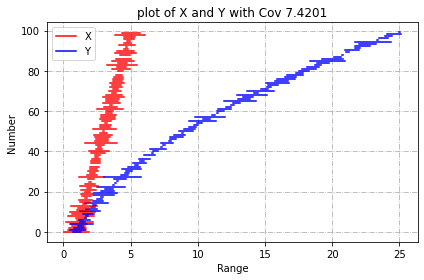

100%|██████████| 1000/1000 [00:00<00:00, 1102.73it/s]

0.7343009079494497
0.9607820639951345


In [47]:
cov_x_w = frechet_covariance(mydatax, mydataw)
show2(mydatax, mydataw, path='./fig/data x and w.jpg', Cov=cov_x_w)

print(frechet_correlation(mydatax, mydataw))
print(frechet_correlation(mydatax, mydataw, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1009.18it/s]


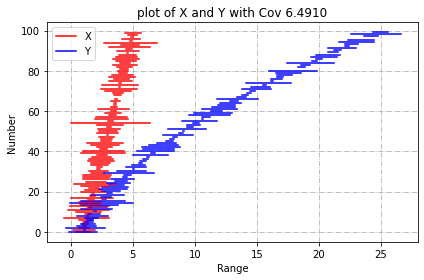

100%|██████████| 1000/1000 [00:00<00:00, 1077.14it/s]

0.5412466496816898
0.9135450358522871


In [33]:
cov_xp_wp = frechet_covariance(mydataxp, mydatawp)
show2(mydataxp, mydatawp, path='./fig/data xp and wp.jpg', Cov=cov_xp_wp)

print(frechet_correlation(mydataxp, mydatawp))
print(frechet_correlation(mydataxp, mydatawp, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1051.67it/s]


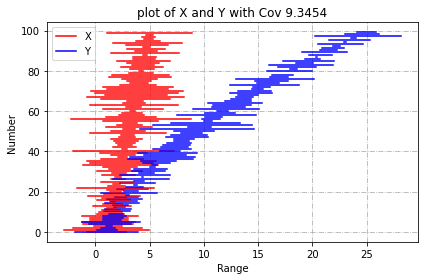

100%|██████████| 1000/1000 [00:00<00:00, 1103.34it/s]

0.5550592034265823
0.7417610202794958


In [36]:
cov_xpp_wpp = frechet_covariance(mydataxpp, mydatawpp)
show2(mydataxpp, mydatawpp, path='./fig/data xpp and wpp.jpg', Cov=cov_xpp_wpp)

print(frechet_correlation(mydataxpp, mydatawpp))
print(frechet_correlation(mydataxpp, mydatawpp, method='symbolic'))

In [11]:
####### 画出区间长度和两个数据的图像
n = 100
np.random.seed(0)
centralx = np.linspace(1,5,n)
centralw = np.square(centralx)
rate = np.linspace(0.5,10,100)
interval_len = abs(np.random.normal(0, 1, n))
h = []
s = []
for i in range(100):
    x = np.zeros((n, 2))
    lx = interval_len * rate[i]
    x[:, 0] = centralx - lx / 2
    x[:, 1] = centralx + lx / 2
    np.savetxt("data/proj1/x %d.csv" % i, x, delimiter=',')

    w = np.zeros((n, 2))
    lw = interval_len * rate[i]
    w[:, 0] = centralw - lw / 2
    w[:, 1] = centralw + lw / 2
    np.savetxt("data/proj1/w %d.csv" % i, w, delimiter=',')

    h.append(frechet_correlation(x, w))
    s.append(frechet_correlation(x, w, method='symbolic'))



100%|██████████| 100/100 [00:00<00:00, 189.58it/s]


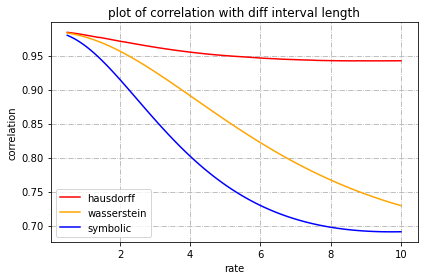

In [12]:
w = np.loadtxt("data/wr.csv", delimiter=',')
plt.plot(rate, h, alpha=1, color='red', label='hausdorff')
plt.plot(rate, w, alpha=1, color='orange', label='wasserstein')
plt.plot(rate, s, alpha=1, color='blue', label='symbolic')

plt.title('plot of correlation with diff interval length')  # 折线图标题

plt.xlabel('rate')  # x轴标题
plt.ylabel('correlation')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./fig/plot of correlation with diff interval length.jpg')
plt.show()

 38%|███▊      | 38/100 [00:00<00:00, 187.51it/s]C:\Users\kangxinlai\anaconda3\lib\site-packages\scipy\optimize\optimize.py:3262: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Jout = np.array(list(mapper(wrapped_func, grid)))
100%|██████████| 100/100 [00:00<00:00, 191.76it/s]


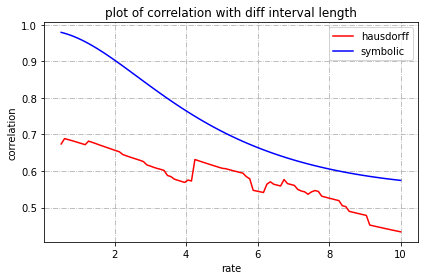

In [14]:
np.random.seed(0)
n = 100
centralx = np.linspace(1,5,n)
centralw = np.square(centralx)
rate = np.linspace(0.5,10,100)
interval_lenx = abs(np.random.normal(0, 1, n))
interval_lenw = abs(np.random.normal(0, 1, n))
h = []
s = []
for i in range(100):
    x = np.zeros((n, 2))
    lx = interval_lenx * rate[i]
    x[:, 0] = centralx - lx / 2
    x[:, 1] = centralx + lx / 2

    w = np.zeros((n, 2))
    lw = interval_lenw * rate[i]
    w[:, 0] = centralw - lw / 2
    w[:, 1] = centralw + lw / 2
    h.append(frechet_correlation(x, w))
    s.append(frechet_correlation(x, w, method='symbolic'))

plt.plot(rate, h, alpha=1, color='red', label='hausdorff')
plt.plot(rate, s, alpha=1, color='blue', label='symbolic')

plt.title('plot of correlation with diff interval length')  # 折线图标题

plt.xlabel('rate')  # x轴标题
plt.ylabel('correlation')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./fig/plot of correlation with diff interval length 2.jpg')
plt.show()

100%|██████████| 100/100 [00:00<00:00, 1029.99it/s]


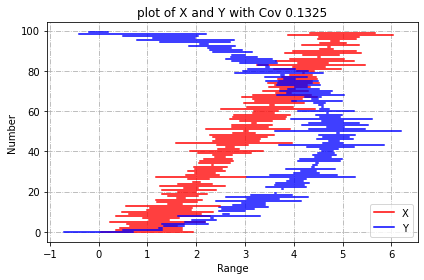

100%|██████████| 1000/1000 [00:00<00:00, 1100.88it/s]

0.0692118555811942
0.036910531323923274


In [14]:
cov_x_r = frechet_covariance(mydatax, mydatar)
show2(mydatax, mydatar, path='./fig/data x and r.jpg', Cov=cov_x_r)

print(frechet_correlation(mydatax, mydatar))
print(frechet_correlation(mydatax, mydatar, method='symbolic'))

 22%|██▏       | 223/1000 [00:00<00:00, 1114.86it/s]

0.06350384377931018


100%|██████████| 100/100 [00:00<00:00, 1019.48it/s]


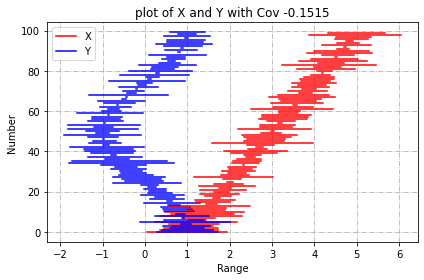

100%|██████████| 1000/1000 [00:00<00:00, 1078.32it/s]

-0.1176901795648911
0.06350384377931018


In [16]:
print(frechet_correlation(mydatax, mydatac, method='symbolic'))
cov_x_c = frechet_covariance(mydatax, mydatac)
show2(mydatax, mydatac, path='./fig/data x and c.jpg', Cov=cov_x_c)

print(frechet_correlation(mydatax, mydatac))
print(frechet_correlation(mydatax, mydatac, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1009.17it/s]


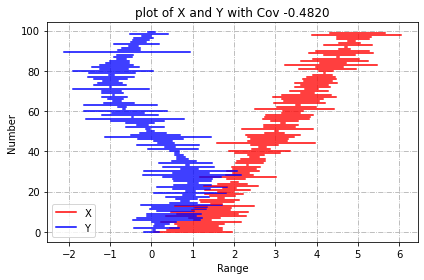

100%|██████████| 1000/1000 [00:00<00:00, 1105.77it/s]

-0.363028009917257
-0.6192841964453473


In [15]:
cov_x_s = frechet_covariance(mydatax, mydatas)
show2(mydatax, mydatas, path='./fig/data x and s.jpg', Cov=cov_x_s)

print(frechet_correlation(mydatax, mydatas))
print(frechet_correlation(mydatax, mydatas, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1014.03it/s]


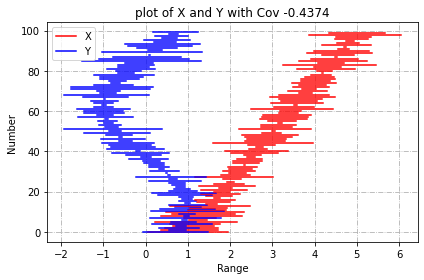

100%|██████████| 1000/1000 [00:00<00:00, 1094.85it/s]

-0.33225105084293793
-0.41265448360443047


In [17]:
cov_x_ss = frechet_covariance(mydatax, mydatass)
show2(mydatax, mydatass, path='./fig/data x and ss.jpg', Cov=cov_x_ss)

print(frechet_correlation(mydatax, mydatass))
print(frechet_correlation(mydatax, mydatass, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1029.75it/s]


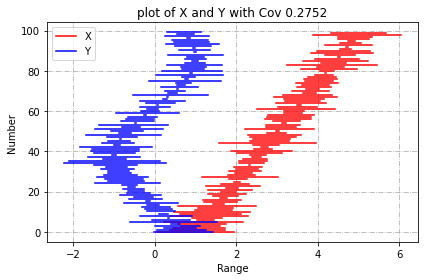

100%|██████████| 1000/1000 [00:00<00:00, 1103.32it/s]

0.2130751184209905
0.55162799790176


In [26]:
cov_x_sss = frechet_covariance(mydatax, mydatasss)
show2(mydatax, mydatasss, path='./fig/data x and sss.jpg', Cov=cov_x_sss)

print(frechet_correlation(mydatax, mydatasss))
print(frechet_correlation(mydatax, mydatasss, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1125.22it/s]


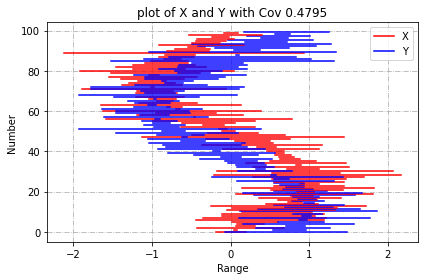

100%|██████████| 1000/1000 [00:00<00:00, 1084.98it/s]

0.5224073152646994
0.6873887088542456


In [27]:
cov_s_ss = frechet_covariance(mydatas, mydatass)
show2(mydatas, mydatass, path='./fig/data s and ss.jpg', Cov=cov_s_ss)

print(frechet_correlation(mydatas, mydatass))
print(frechet_correlation(mydatas, mydatass, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1074.29it/s]


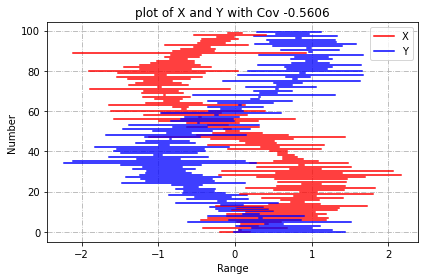

100%|██████████| 1000/1000 [00:00<00:00, 1099.68it/s]

-0.6225912573219706
-0.5274378354959274


In [28]:
cov_s_sss = frechet_covariance(mydatas, mydatasss)
show2(mydatas, mydatasss, path='./fig/data s and sss.jpg', Cov=cov_s_sss)

print(frechet_correlation(mydatas, mydatasss))
print(frechet_correlation(mydatas, mydatasss, method='symbolic'))

100%|██████████| 100/100 [00:00<00:00, 1097.90it/s]


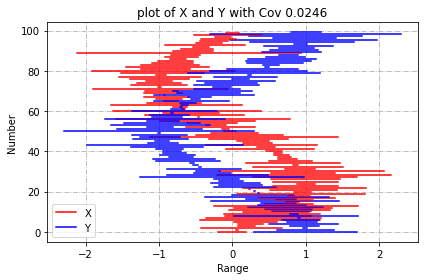

100%|██████████| 1000/1000 [00:00<00:00, 1099.71it/s]

0.02702394265374691
0.08610541909063966


In [29]:
cov_s_c = frechet_covariance(mydatas, mydatac)
show2(mydatas, mydatac, path='./fig/data s and c.jpg', Cov=cov_s_c)

print(frechet_correlation(mydatas, mydatac))
print(frechet_correlation(mydatas, mydatac, method='symbolic'))

##### 使用show3() 画图

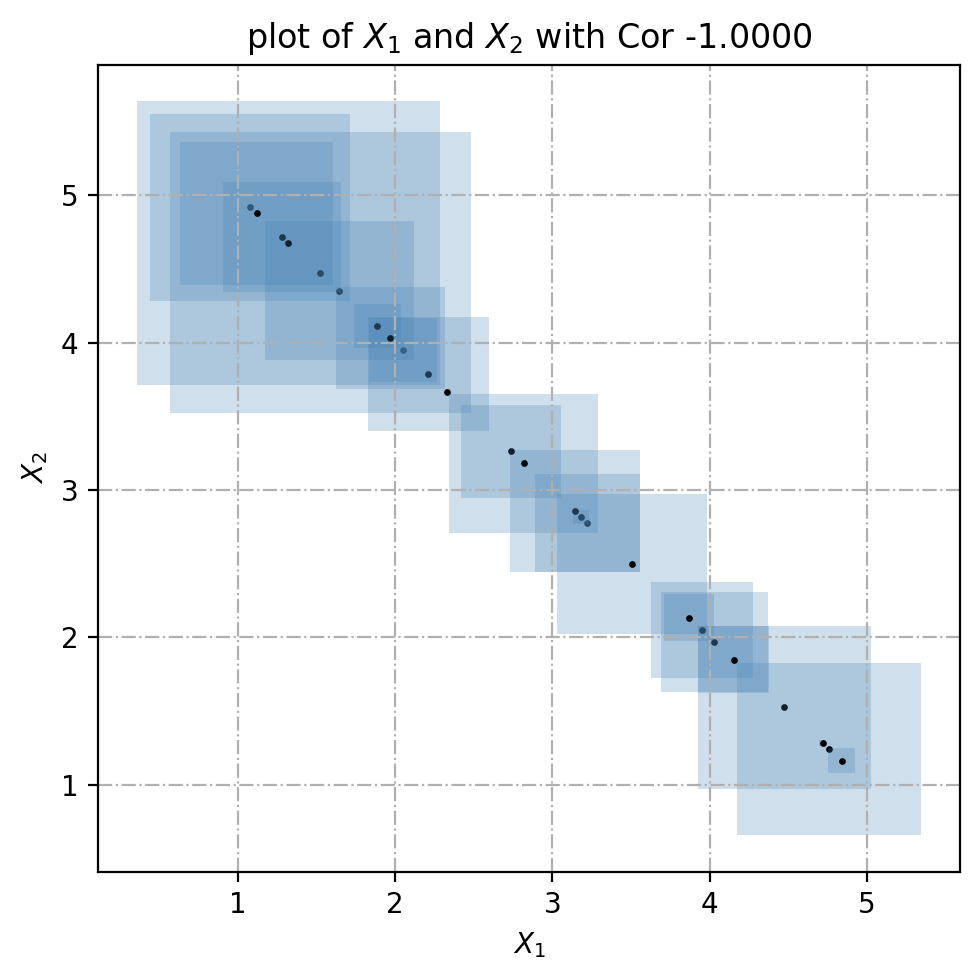

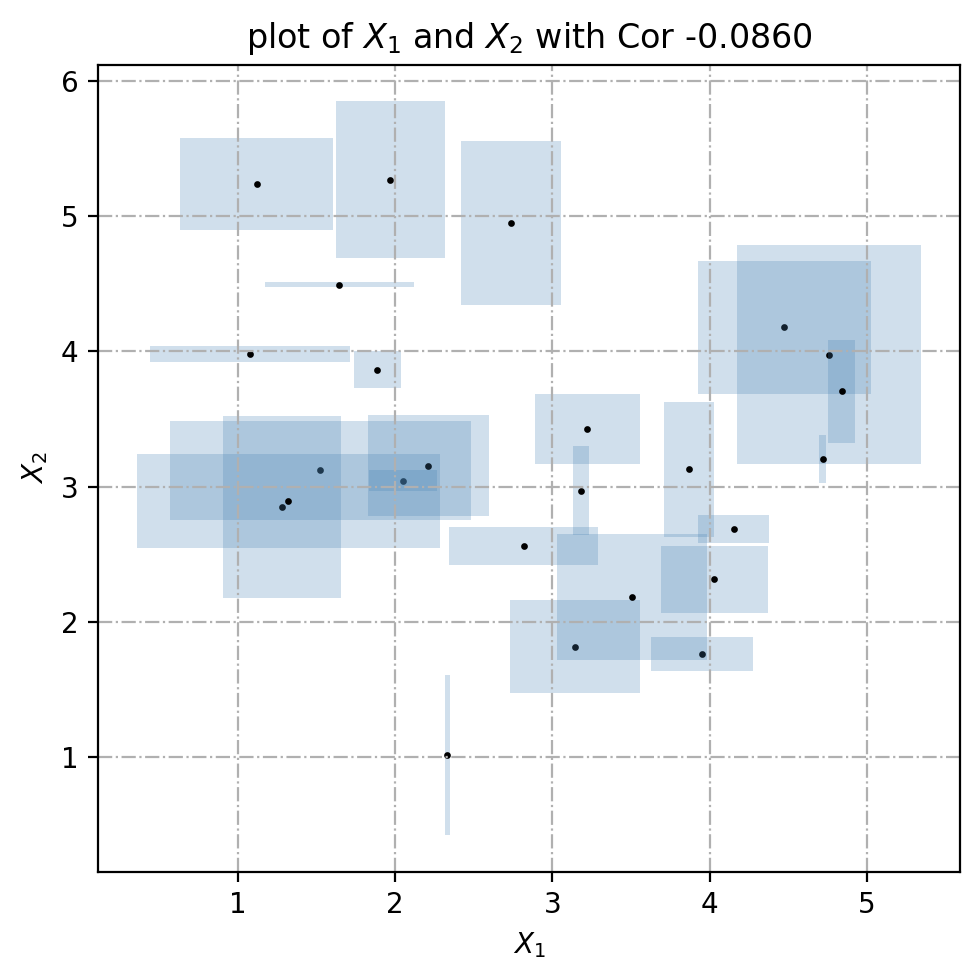

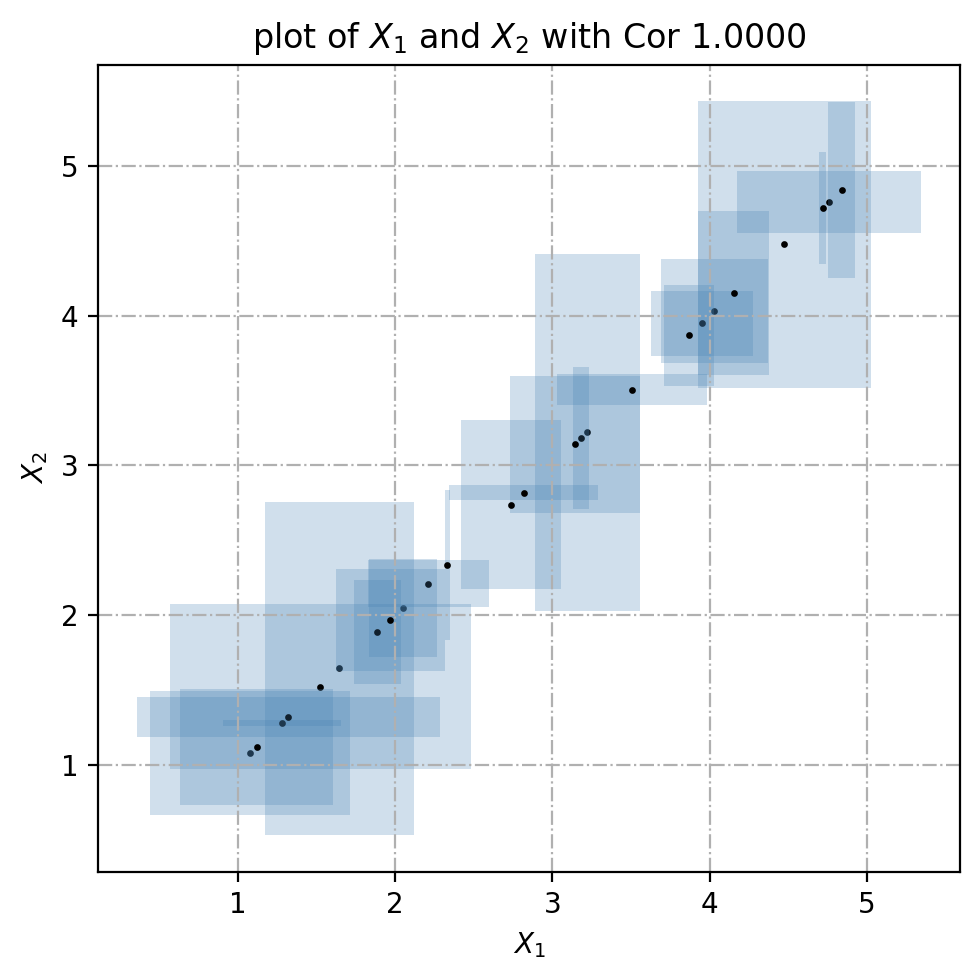

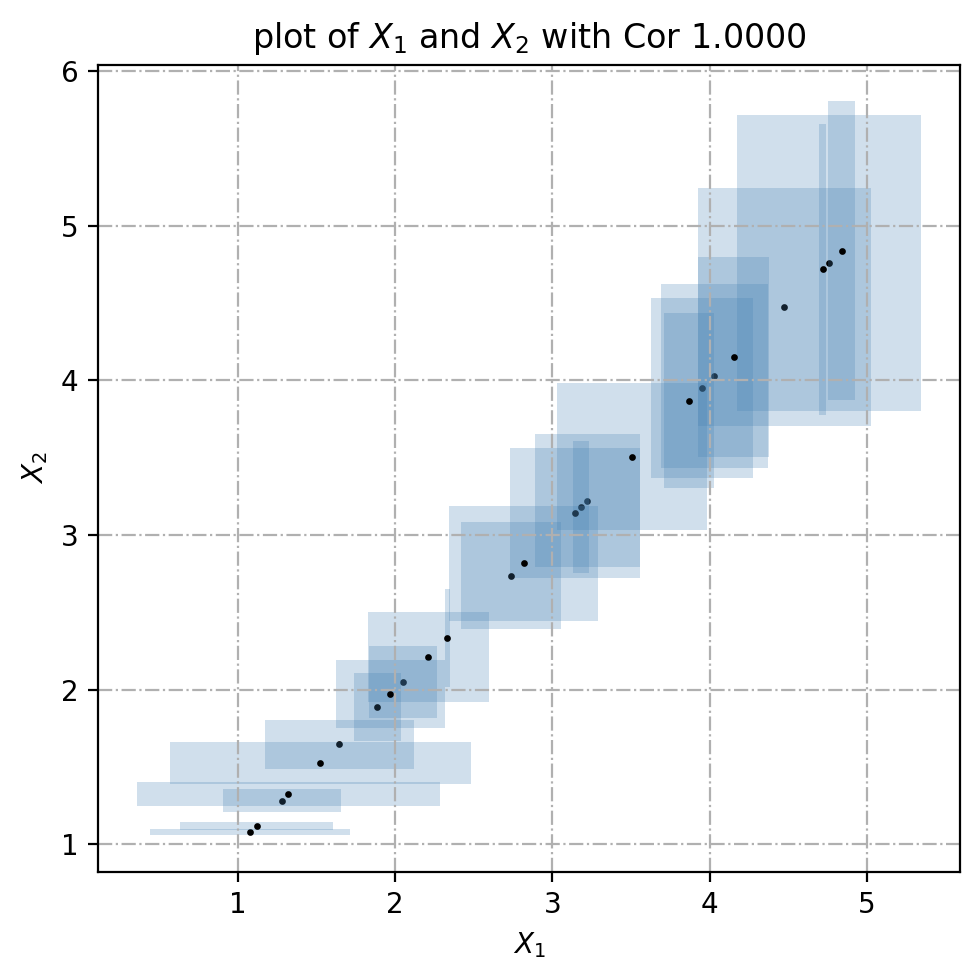

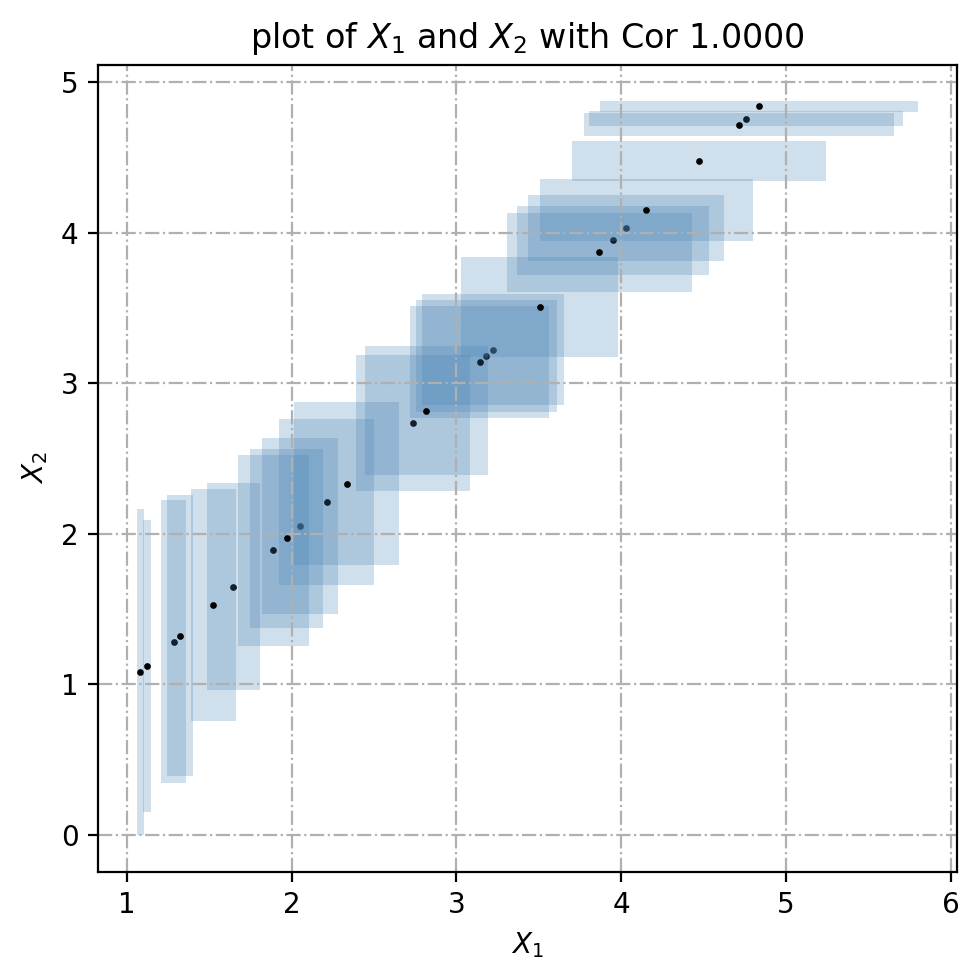

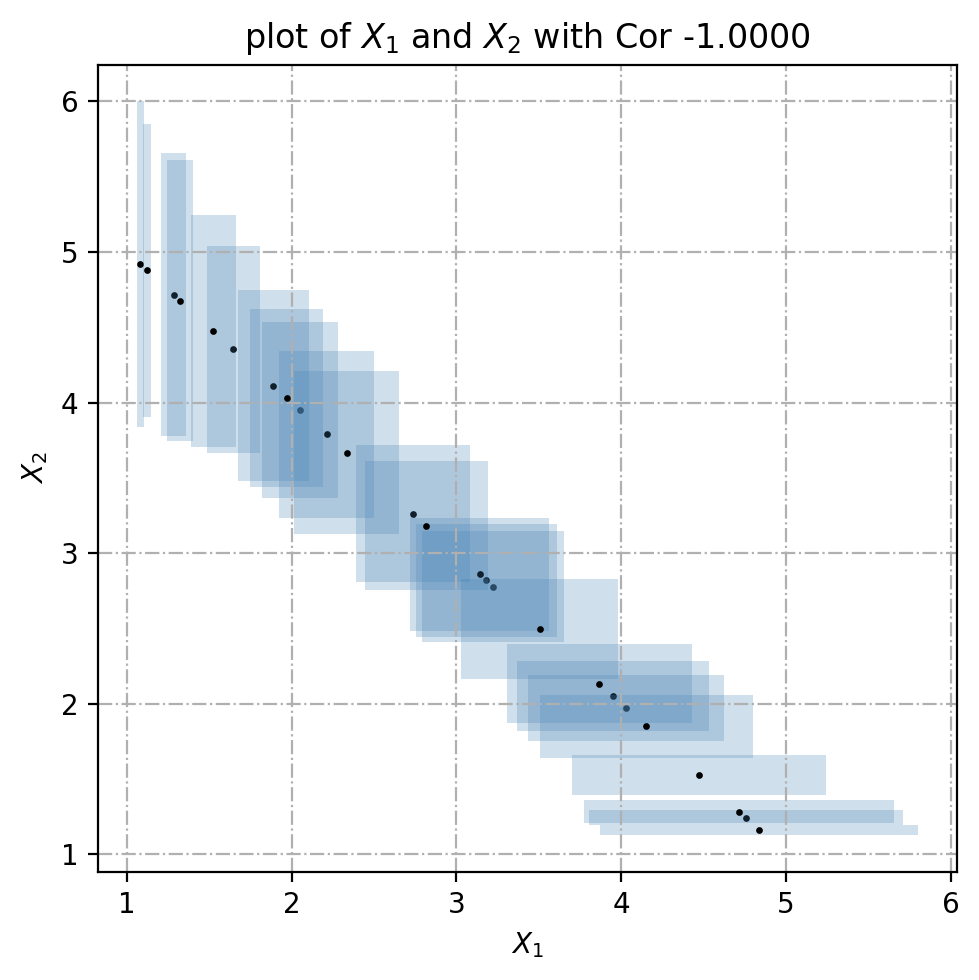

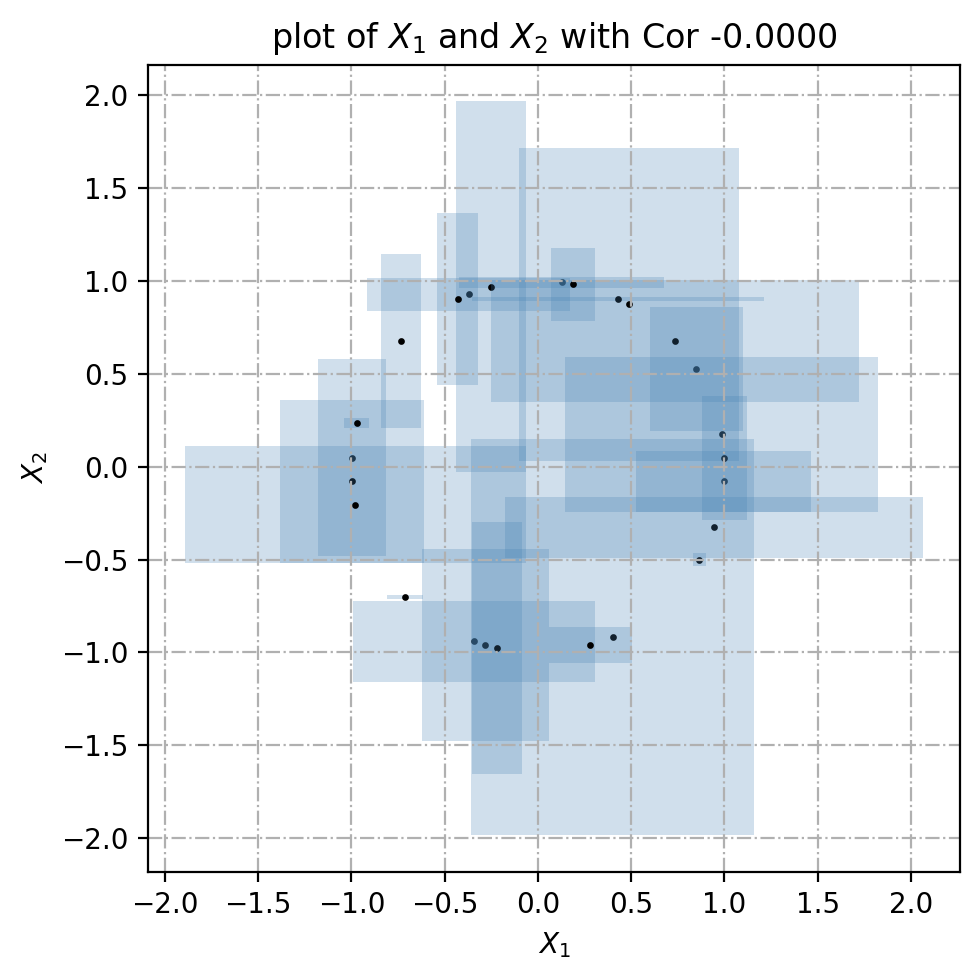

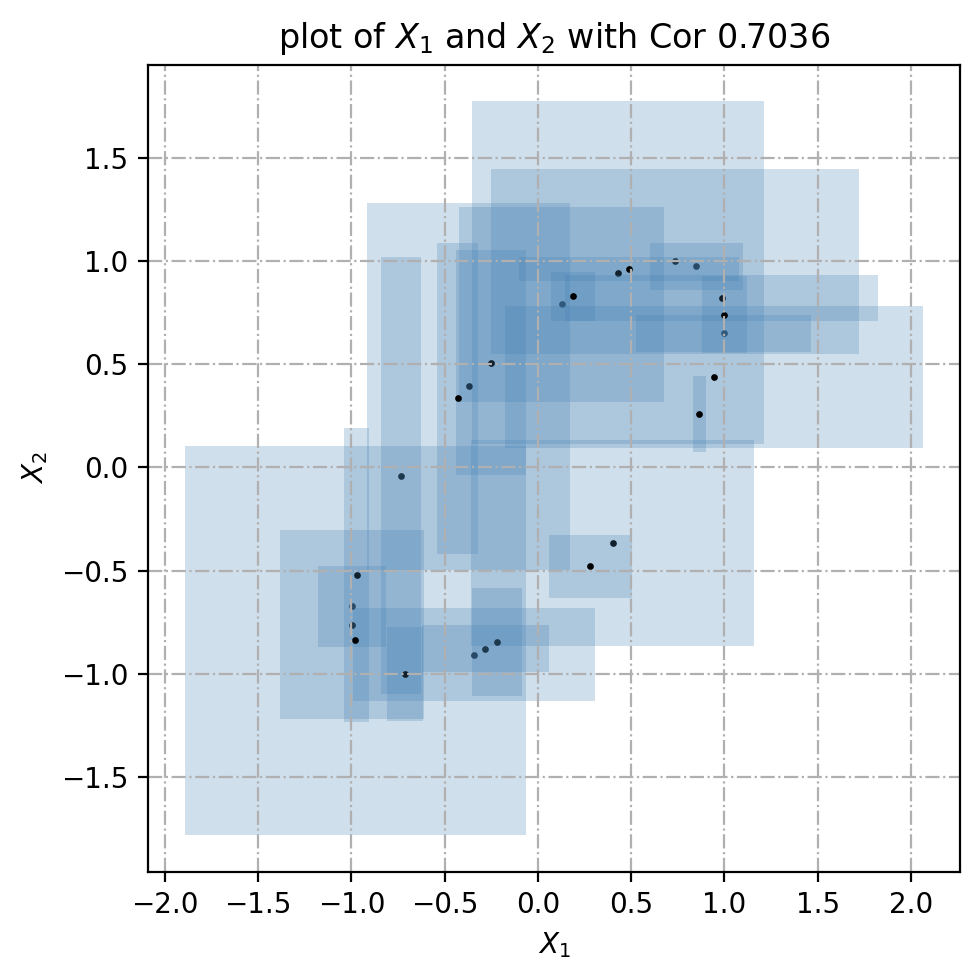

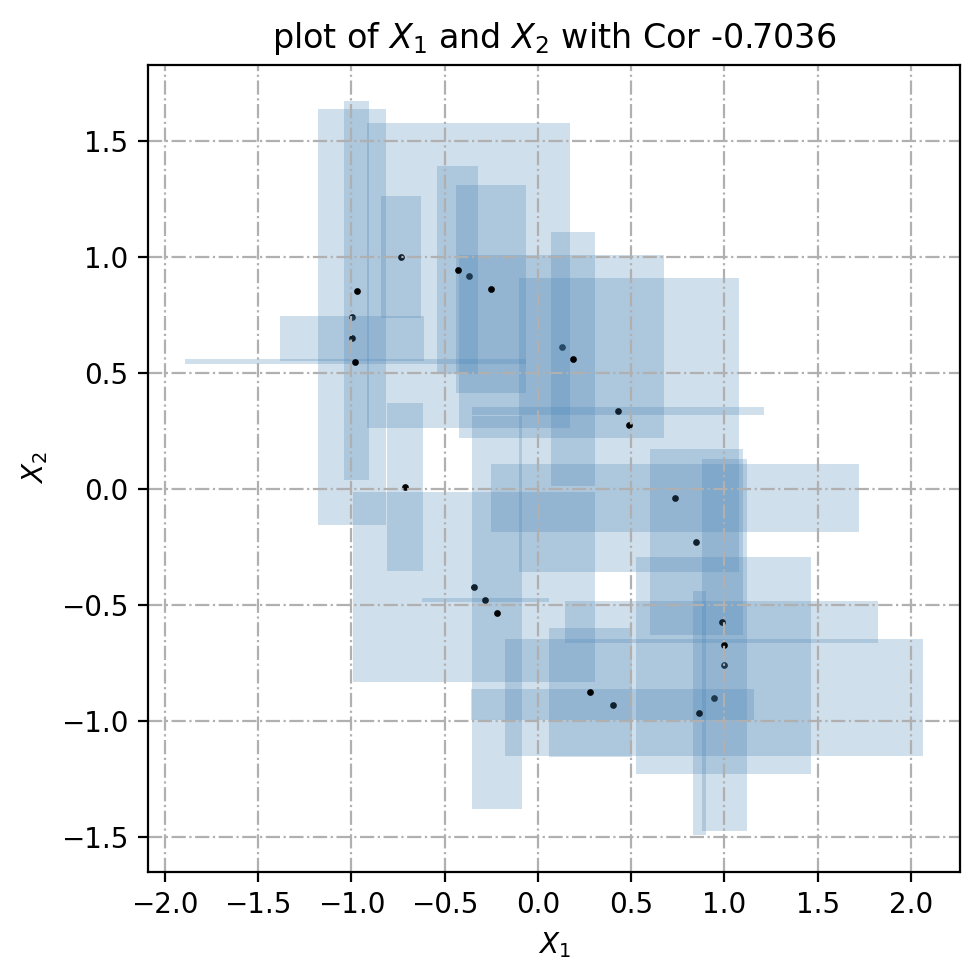

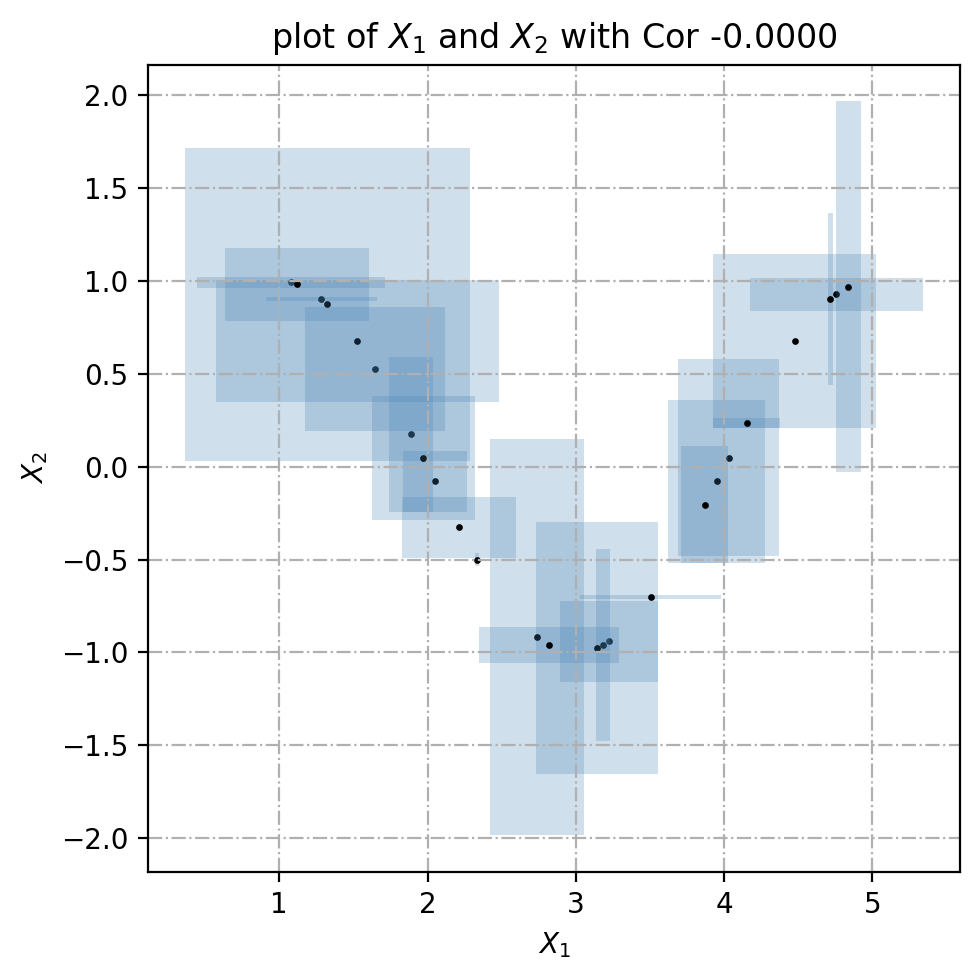

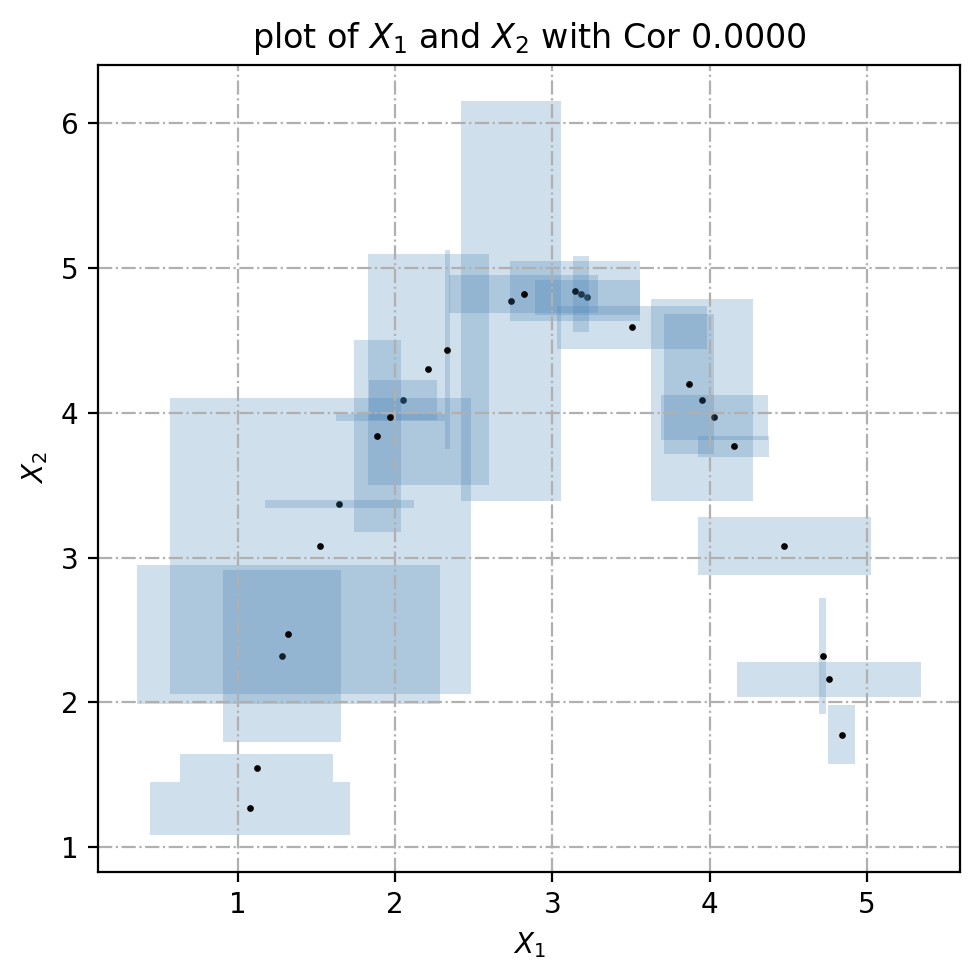

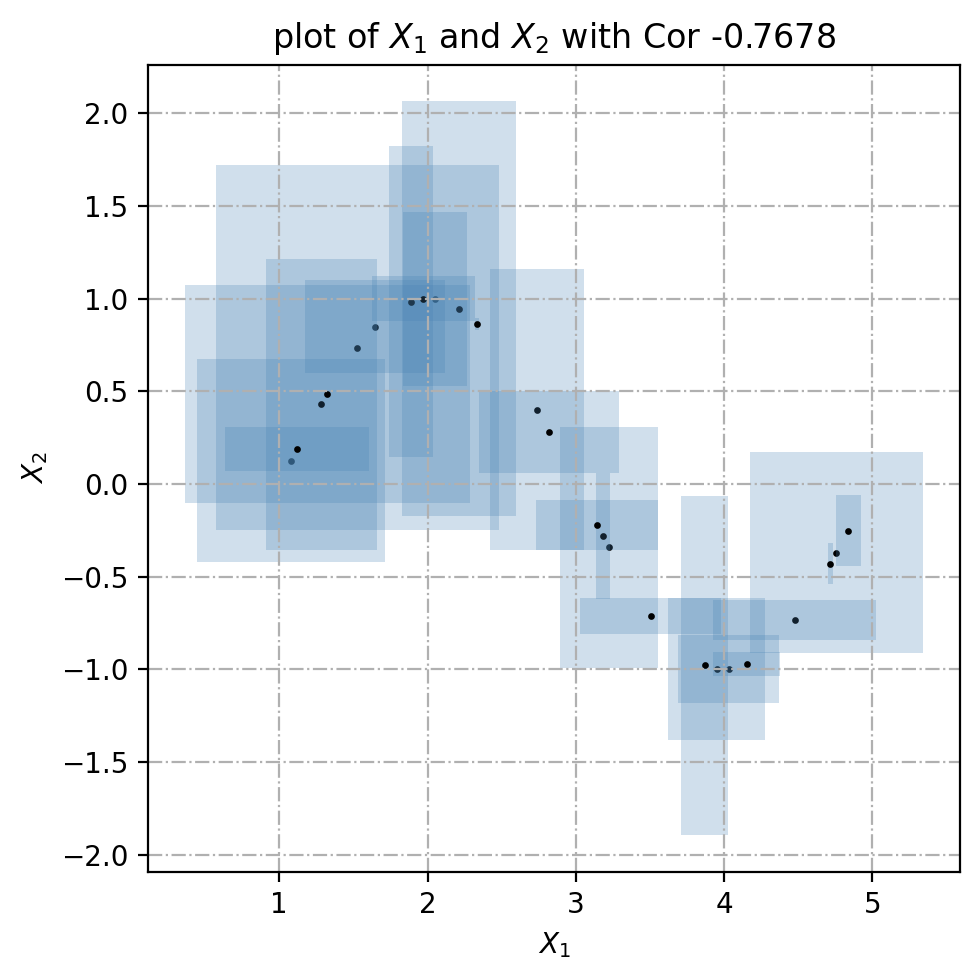

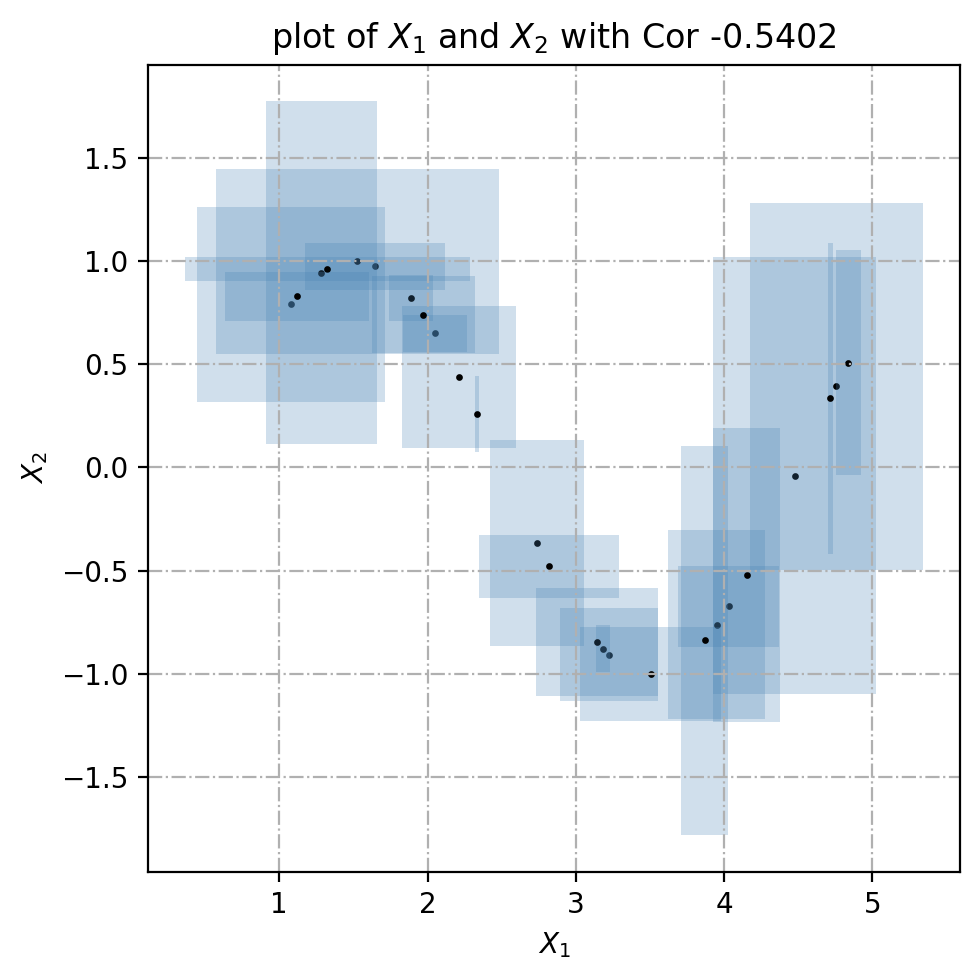

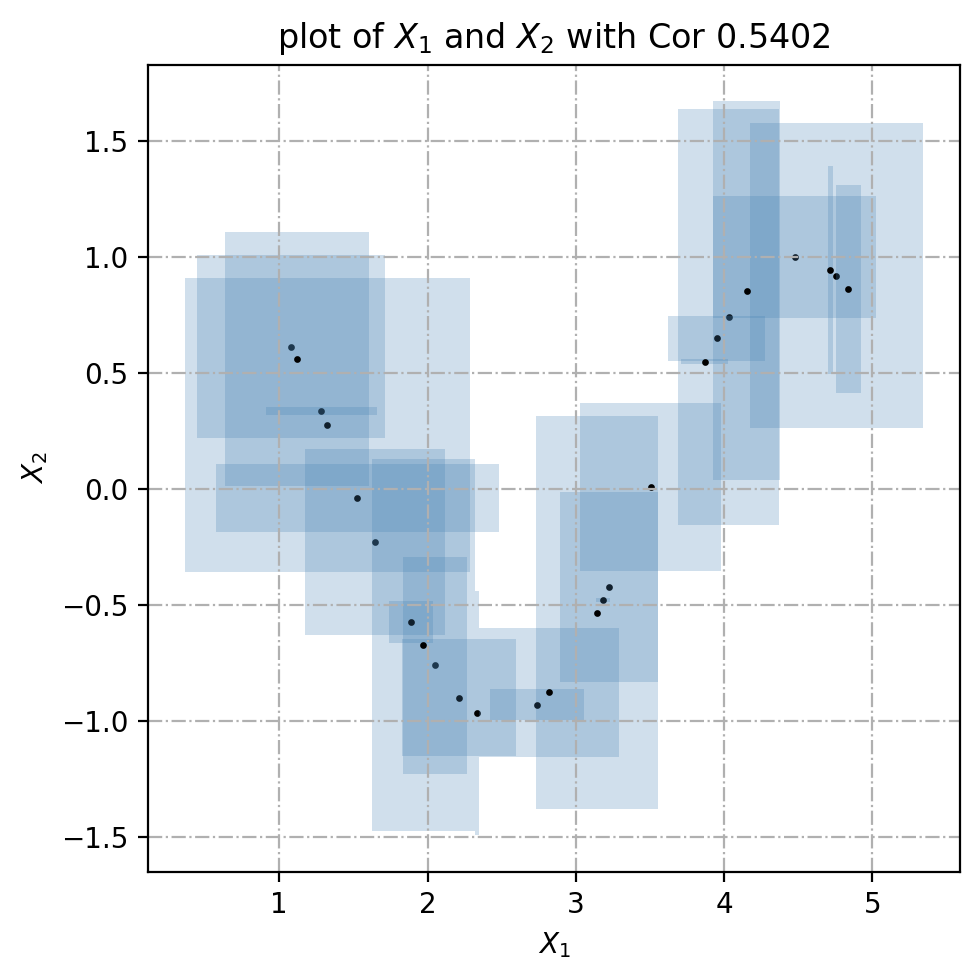

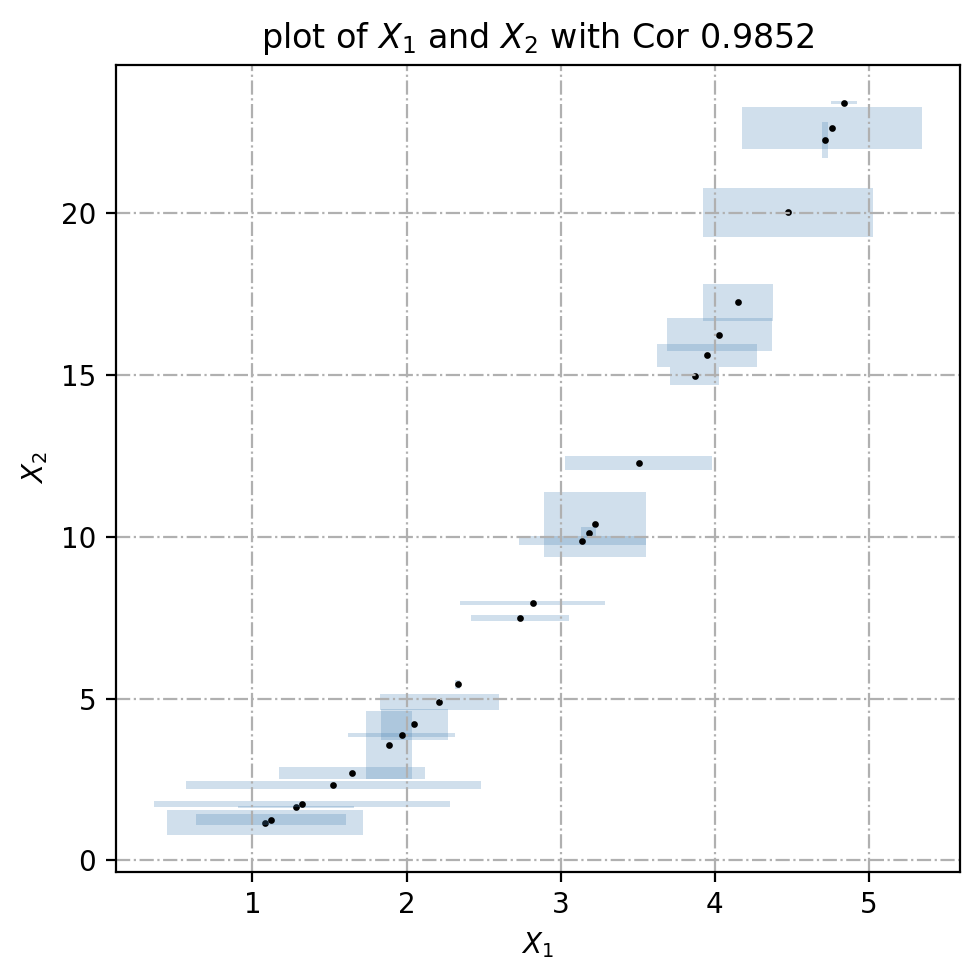

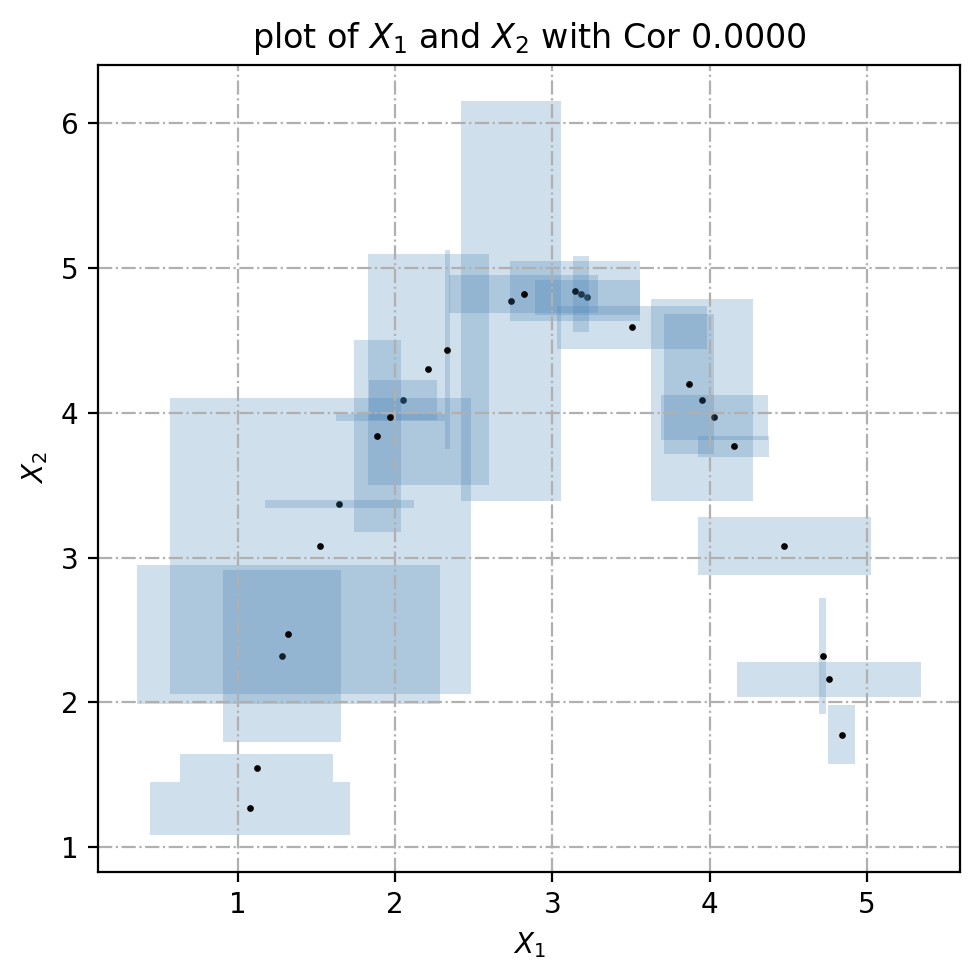

In [3]:
real_x_y = np.vstack((centralx, centraly)).T
show3(mydatax, mydatay, path = './fig/data3 x and y.jpg', real = real_x_y, Cor = np.corrcoef(real_x_y.T)[0][1])

real_x_z = np.vstack((centralx, centralz)).T
show3(mydatax, mydataz, path = './fig/data3 x and z.jpg', real = real_x_z, Cor = np.corrcoef(real_x_z.T)[0][1])

real_x_xx = np.vstack((centralx, centralx)).T
show3(mydatax, mydataxx, path = './fig/data3 x and xx.jpg', real = real_x_xx, Cor = np.corrcoef(real_x_xx.T)[0][1])

real_x_xxx = np.vstack((centralx, centralx)).T
show3(mydatax, mydataxxx, path = './fig/data3 x and xxx.jpg', real = real_x_xxx, Cor = np.corrcoef(real_x_xxx.T)[0][1])

real_xxx_xxxx = np.vstack((centralx, centralx)).T
show3(mydataxxx, mydataxxxx, path = './fig/data3 xxx and xxxx.jpg', real = real_xxx_xxxx, Cor = np.corrcoef(real_xxx_xxxx.T)[0][1])

real_xxx_yy = np.vstack((centralx, centraly)).T
show3(mydataxxx, mydatayy, path = './fig/data3 xxx and yy.jpg', real = real_xxx_yy, Cor = np.corrcoef(real_xxx_yy.T)[0][1])

real_s_c = np.vstack((centrals, centralc)).T
show3(mydatas, mydatac, path = './fig/data3 s and c.jpg', real = real_s_c, Cor = np.corrcoef(real_s_c.T)[0][1])

real_s_ss = np.vstack((centrals, centralss)).T
show3(mydatas, mydatass, path = './fig/data3 s and ss.jpg', real = real_s_ss, Cor = np.corrcoef(real_s_ss.T)[0][1])

real_s_sss = np.vstack((centrals, centralsss)).T
show3(mydatas, mydatasss, path = './fig/data3 s and sss.jpg', real = real_s_sss, Cor = np.corrcoef(real_s_sss.T)[0][1])

real_x_c = np.vstack((centralx, centralc)).T
show3(mydatax, mydatac, path = './fig/data3 x and c.jpg', real = real_x_c, Cor = np.corrcoef(real_x_c.T)[0][1])

real_x_r = np.vstack((centralx, centralr)).T
show3(mydatax, mydatar, path = './fig/data3 x and r.jpg', real = real_x_r, Cor = np.corrcoef(real_x_r.T)[0][1])

real_x_s = np.vstack((centralx, centrals)).T
show3(mydatax, mydatas, path = './fig/data3 x and s.jpg', real = real_x_s, Cor = np.corrcoef(real_x_s.T)[0][1])

real_x_ss = np.vstack((centralx, centralss)).T
show3(mydatax, mydatass, path = './fig/data3 x and ss.jpg', real = real_x_ss, Cor = np.corrcoef(real_x_ss.T)[0][1])

real_x_sss = np.vstack((centralx, centralsss)).T
show3(mydatax, mydatasss, path = './fig/data3 x and sss.jpg', real = real_x_sss, Cor = np.corrcoef(real_x_sss.T)[0][1])

real_x_w = np.vstack((centralx, centralw)).T
show3(mydatax, mydataw, path = './fig/data3 x and w.jpg', real = real_x_w, Cor = np.corrcoef(real_x_w.T)[0][1])

real_x_r = np.vstack((centralx, centralr)).T
show3(mydatax, mydatar, path = './fig/data3 x and r.jpg', real = real_x_r, Cor = np.corrcoef(real_x_r.T)[0][1])

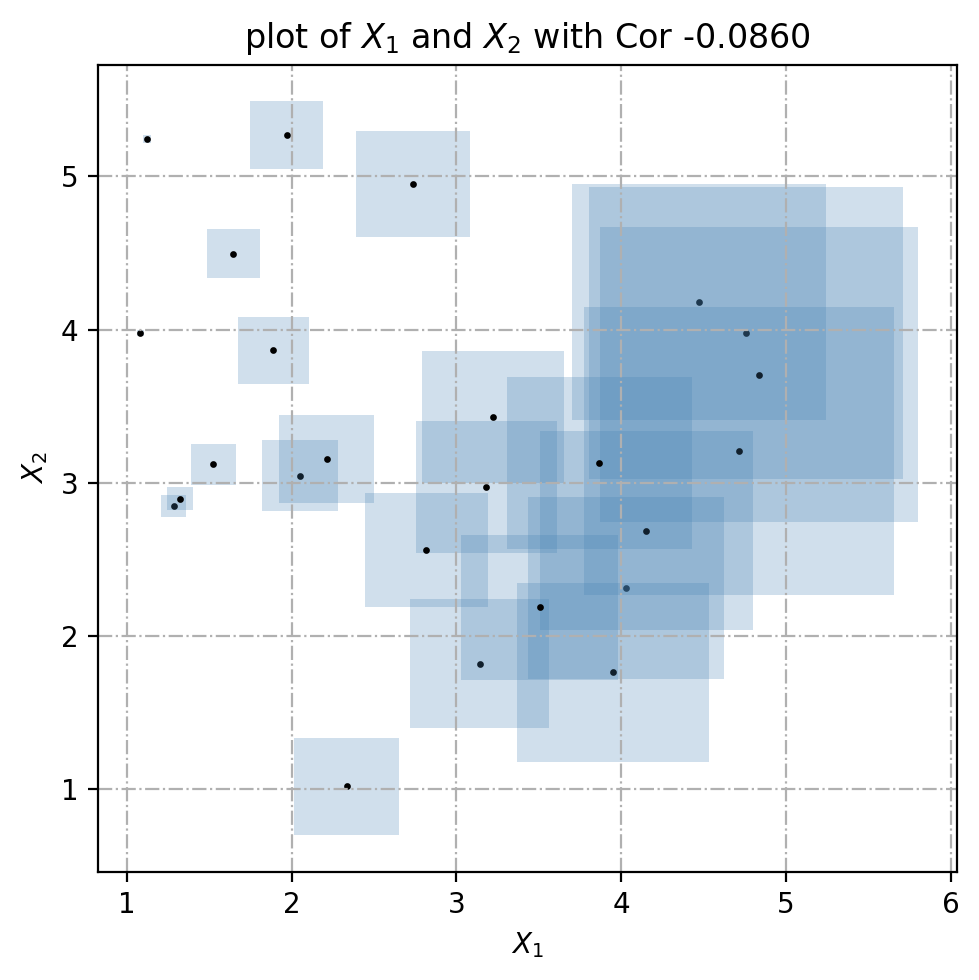

100%|██████████| 100/100 [00:00<00:00, 122.28it/s]

0.27591816366041816
-0.008955678197654509


In [5]:
### 补充实验
real_xxx_zz = np.vstack((centralx, centralz)).T
show3(mydataxxx, mydatazz, path = './fig/data3 xxx and zz.jpg', real = real_xxx_zz, Cor = np.corrcoef(real_xxx_zz.T)[0][1])

print(frechet_correlation(mydataxxx, mydatazz))
print(frechet_correlation(mydataxxx, mydatazz, method='symbolic'))


In [3]:
print(frechet_correlation(mydatax, mydataz, method='hausdorff1'))
print(frechet_correlation(mydatax, mydataxx, method='hausdorff1'))
print(frechet_correlation(mydataxxx, mydataxxxx, method='hausdorff1'))
print(frechet_correlation(mydataxxx, mydatazz, method='hausdorff1'))

 19%|█▉        | 19/100 [00:00<00:00, 186.96it/s]

-0.05675845368127278


 19%|█▉        | 19/100 [00:00<00:00, 184.30it/s]

0.9161551709244702


 21%|██        | 21/100 [00:00<00:00, 203.70it/s]

0.8314653706596621


100%|██████████| 100/100 [00:00<00:00, 192.87it/s]

0.21496558653524336


In [4]:
print(frechet_correlation(mydatax, mydatay, method='hausdorff1'))

100%|██████████| 100/100 [00:00<00:00, 203.48it/s]

-0.668447937512722


In [5]:
print(frechet_correlation(mydatax, mydatax, method='hausdorff1'))

100%|██████████| 100/100 [00:00<00:00, 187.10it/s]

1.0000000000000004


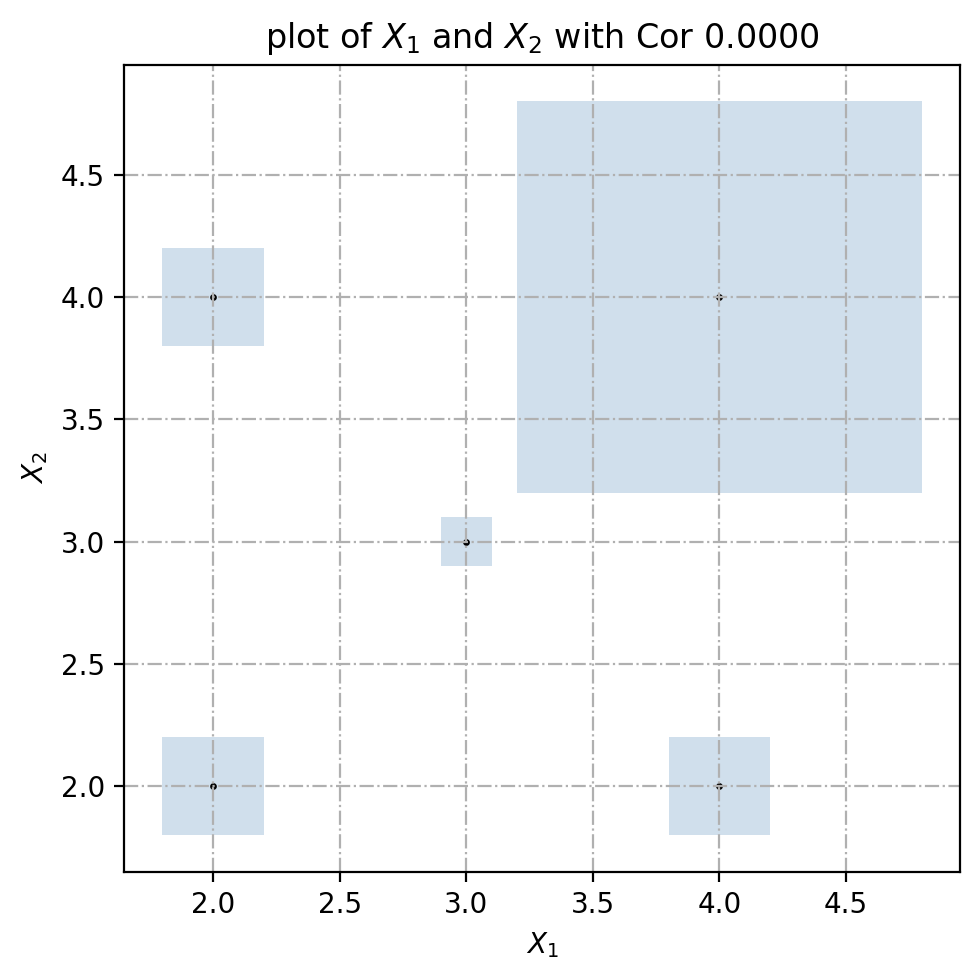

100%|██████████| 5/5 [00:00<00:00, 124.88it/s]

0.2530446549391068
0.0602975724353954


In [3]:
### 补充实验2
real = np.array([[3,3], [2,4], [2,2], [4,4], [4,2]])
x = np.array([[2.9,3.1], [1.8,2.2], [1.8,2.2], [3.2,4.8], [3.8, 4.2]])
xm = frechet_mean(x)['interval']
y = np.array([[2.9,3.1], [3.8,4.2], [1.8,2.2], [3.2, 4.8], [1.8, 2.2]])
ym = frechet_mean(y)['interval']

show3(x, y, path = './fig/data3 x5 and y5.jpg', real = real, Cor = np.corrcoef(real.T)[0][1], samples=5)

print(frechet_correlation(x, y))
print(frechet_correlation(x, y, method='symbolic'))

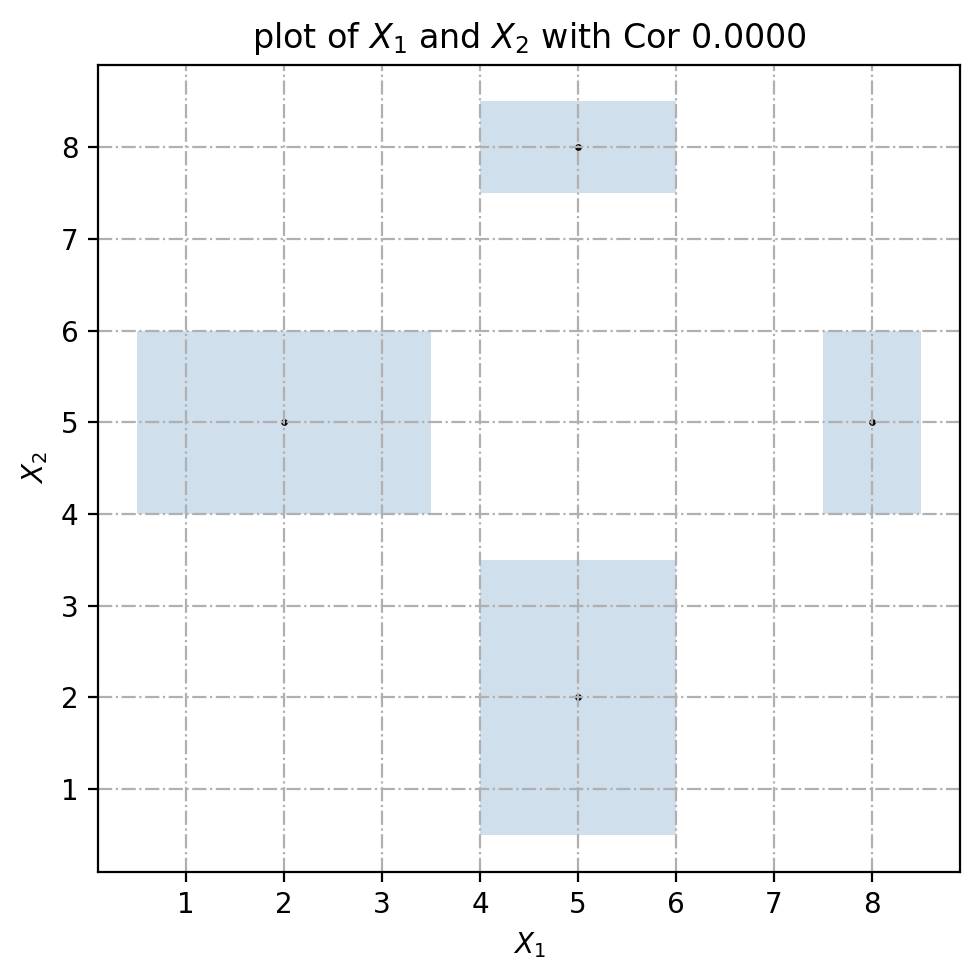

100%|██████████| 4/4 [00:00<00:00, 210.33it/s]

0.0
0.06837606837606837


In [14]:
# 补充实验 3
real = np.array([[2, 5], [5, 2], [5, 8], [8, 5]])
x = np.array([[0.5, 3.5], [4, 6], [4, 6], [7.5, 8.5]])
xm = frechet_mean(x)['interval']
y = np.array([[4, 6], [0.5, 3.5], [7.5, 8.5], [4, 6]])
ym = frechet_mean(y)['interval']

show3(x, y, path = './fig/data3 x4 and y4.jpg', real = real, Cor = np.corrcoef(real.T)[0][1], samples=4)

print(frechet_correlation(x, y))
print(frechet_correlation(x, y, method='symbolic'))

In [10]:
## 测试dsum()
result = optimize.fminbound(fdsum, min(x[:, 0]), max(x[:, 0]), args=(x,), full_output=True)

ValueError: too many values to unpack (expected 2)

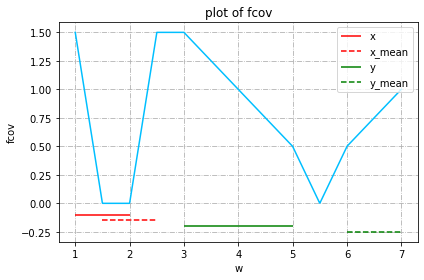

In [2]:
# 测试 fcov()
x = np.array([1, 2])
x_mean = np.array([1.5, 2.5])
y = np.array([3, 5])
y_mean = np.array([6,7])

f = []
w = np.linspace(1, 7, 1000)
for i in range(1000):
    f.append(-1 * fcov(w[i], x, y, x_mean, y_mean))

plt.plot(w, f, alpha=1, color='deepskyblue')
plt.hlines(-0.1, x[0], x[1], color='red', label='x')
plt.hlines(-0.15, x_mean[0], x_mean[1], color='red', linestyles='--', label='x_mean')
plt.hlines(-0.2, y[0], y[1], color='green', label='y')
plt.hlines(-0.25, y_mean[0], y_mean[1], color='green', linestyles='--', label='y_mean')

plt.title('plot of fcov')  # 折线图标题
plt.xlabel('w')  # x轴标题
plt.ylabel('fcov')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

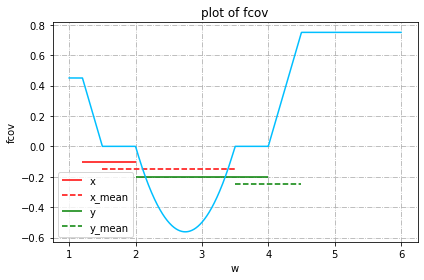

In [15]:
# 测试 fcov()
x = np.array([1.2, 2])
x_mean = np.array([1.5, 3.5])
y = np.array([2, 4])
y_mean = np.array([3.5,4.5])

f = []
w = np.linspace(1, 6, 1000)
for i in range(1000):
    # f.append(-1 * fcov(w[i], x, y, x_mean, y_mean))
    f.append(ffcov(w[i], x, y, x_mean, y_mean))

plt.plot(w, f, alpha=1, color='deepskyblue')
plt.hlines(-0.1, x[0], x[1], color='red', label='x')
plt.hlines(-0.15, x_mean[0], x_mean[1], color='red', linestyles='--', label='x_mean')
plt.hlines(-0.2, y[0], y[1], color='green', label='y')
plt.hlines(-0.25, y_mean[0], y_mean[1], color='green', linestyles='--', label='y_mean')

plt.title('plot of fcov')  # 折线图标题
plt.xlabel('w')  # x轴标题
plt.ylabel('fcov')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.show()

output1 = optimize.brute(fcov, ranges = ((x[0], x[1]), ), args=(x, y, x_mean, y_mean), full_output=True, finish=optimize.fmin)
output2 = optimize.brute(fcov, ranges = ((x_mean[0], x_mean[1]), ), args=(x, y, x_mean, y_mean), full_output=True, finish=optimize.fmin)
output3 = optimize.brute(fcov, ranges = ((y[0], y[1]), ), args=(x, y, x_mean, y_mean), full_output=True, finish=optimize.fmin)
output4 = optimize.brute(fcov, ranges = ((y_mean[0], y_mean[1]), ), args=(x, y, x_mean, y_mean), full_output=True, finish=optimize.fmin)
output = [output1, output2, output3, output4]
m_out= max([-1*i[1] for i in output])
for i in range(4):
    if output[i][1] * -1 ==m_out:
        max_output = output[i]

C:\Users\kangxinlai\anaconda3\lib\site-packages\scipy\optimize\optimize.py:3262: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Jout = np.array(list(mapper(wrapped_func, grid)))


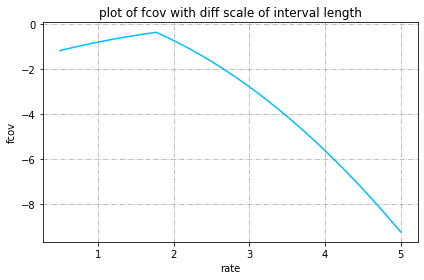

In [2]:
## 测试interval length 变化的时候最大值的变化
x = np.array([1.2, 2])
x_mean = np.array([1.5, 3.5])
y = np.array([2, 4])
y_mean = np.array([3.8,4.5])

def test(rate):
    m_out = []
    for i in range(len(rate)):
        r = rate[i]
        xx = np.array([np.mean(x) - (x[1]-x[0])*r/2, np.mean(x) + (x[1]-x[0])*r/2])
        xx_mean = np.array([np.mean(x_mean) - (x_mean[1]-x_mean[0])*r/2, np.mean(x_mean) + (x_mean[1]-x_mean[0])*r/2])
        yy = np.array([np.mean(y) - (y[1]-y[0])*r/2, np.mean(y) + (y[1]-y[0])*r/2])
        yy_mean = np.array([np.mean(y_mean) - (y_mean[1]-y_mean[0])*r/2, np.mean(y_mean) + (y_mean[1]-y_mean[0])*r/2])

        output1 = optimize.brute(fcov, ranges = ((xx[0], xx[1]), ), args=(xx, yy, xx_mean, yy_mean), full_output=True, finish=optimize.fmin)
        output2 = optimize.brute(fcov, ranges = ((xx_mean[0], xx_mean[1]), ), args=(xx, yy, xx_mean, yy_mean), full_output=True, finish=optimize.fmin)
        output3 = optimize.brute(fcov, ranges = ((yy[0], yy[1]), ), args=(xx, yy, xx_mean, yy_mean), full_output=True, finish=optimize.fmin)
        output4 = optimize.brute(fcov, ranges = ((yy_mean[0], yy_mean[1]), ), args=(xx, yy, xx_mean, yy_mean), full_output=True, finish=optimize.fmin)
        output = [output1, output2, output3, output4]
        m= max([-1*i[1] for i in output])
        for i in range(4):
            if output[i][1] * -1 == m:
                max_output = output[i]
        m_out.append(ffcov(max_output[0][0], xx, yy, xx_mean, yy_mean))
    return m_out

rate = np.linspace(0.5, 5 , 200)
m_out = test(rate)

plt.plot(rate, m_out, alpha=1, color='deepskyblue')
plt.title('plot of fcov with diff scale of interval length')  # 折线图标题
plt.xlabel('rate')  # x轴标题
plt.ylabel('fcov')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.tight_layout()
plt.show()

### arithmetic-based method

In [4]:
real_x_y = np.vstack((centralx, centraly)).T

print("hausdorff-cor: %.4f" % frechet_correlation(mydatax, mydatay))
print("midpoint-cor: %.4f" % np.corrcoef(real_x_y.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(mydatax, mydatay, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(mydatax, mydatay, method='arithmetic-based'))

real_x_z = np.vstack((centralx, centralz)).T
# show3(mydatax, mydataz, path = './fig/data3 x and z.jpg', real = real_x_z, Cor = np.corrcoef(real_x_z.T)[0][1])

print("hausdorff-cor: %.4f" % frechet_correlation(mydatax, mydataz))
print("midpoint-cor: %.4f" % np.corrcoef(real_x_z.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(mydatax, mydataz, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(mydatax, mydataz, method='arithmetic-based'))

real_x_xx = np.vstack((centralx, centralx)).T
# show3(mydatax, mydataxx, path = './fig/data3 x and xx.jpg', real = real_x_xx, Cor = np.corrcoef(real_x_xx.T)[0][1])
print("hausdorff-cor: %.4f" % frechet_correlation(mydatax, mydataxx))
print("midpoint-cor: %.4f" % np.corrcoef(real_x_xx.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(mydatax, mydataxx, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(mydatax, mydataxx, method='arithmetic-based'))

real_xxx_xxxx = np.vstack((centralx, centralx)).T
# show3(mydataxxx, mydataxxxx, path = './fig/data3 xxx and xxxx.jpg', real = real_xxx_xxxx, Cor = np.corrcoef(real_xxx_xxxx.T)[0][1])
print("hausdorff-cor: %.4f" % frechet_correlation(mydataxxx, mydataxxxx))
print("midpoint-cor: %.4f" % np.corrcoef(real_xxx_xxxx.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(mydataxxx, mydataxxxx, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(mydataxxx, mydataxxxx, method='arithmetic-based'))

real_xxx_zz = np.vstack((centralx, centralz)).T
# show3(mydataxxx, mydatazz, path = './fig/data3 xxx and zz.jpg', real = real_xxx_zz, Cor = np.corrcoef(real_xxx_zz.T)[0][1])
print("hausdorff-cor: %.4f" % frechet_correlation(mydataxxx, mydatazz))
print("midpoint-cor: %.4f" % np.corrcoef(real_xxx_zz.T)[0][1])
print("symbolic-cor: %.4f" % frechet_correlation(mydataxxx, mydatazz, method='symbolic'))
print("arithmetic-based-cor: %.4f" % frechet_correlation(mydataxxx, mydatazz, method='arithmetic-based'))


 23%|██▎       | 23/100 [00:00<00:00, 223.11it/s]

hausdorff-cor: -0.6006
midpoint-cor: -1.0000
symbolic-cor: -0.8762
arithmetic-based-cor: -0.9031


 21%|██        | 21/100 [00:00<00:00, 202.32it/s]

hausdorff-cor: -0.0544
midpoint-cor: -0.0860
symbolic-cor: -0.0349
arithmetic-based-cor: -0.0790


 21%|██        | 21/100 [00:00<00:00, 201.74it/s]

hausdorff-cor: 0.8918
midpoint-cor: 1.0000
symbolic-cor: 0.9826
arithmetic-based-cor: 0.9569


 23%|██▎       | 23/100 [00:00<00:00, 223.10it/s]

hausdorff-cor: 0.6682
midpoint-cor: 1.0000
symbolic-cor: 0.9661
arithmetic-based-cor: 0.9063


100%|██████████| 100/100 [00:00<00:00, 210.53it/s]


hausdorff-cor: 0.2759
midpoint-cor: -0.0860
symbolic-cor: -0.0090
arithmetic-based-cor: -0.0202


### 测试在两个总体不相关的情况下，H-F cor 的分布是如何的

In [21]:
np.random.seed(0)
corlist = []
m = 100
n = 500
for i in range(m):
    x1_r = abs(np.random.random(n)) * 2
    x1_c = np.random.randn(n)
    x1 = np.vstack((x1_c-x1_r, x1_c+x1_r)).T

    x2_r = abs(np.random.random(n)) * 2
    x2_c = np.random.randn(n)
    x2 = np.vstack((x2_c-x2_r, x2_c+x2_r)).T

    corlist.append(frechet_correlation(x1, x2) * np.sqrt(n))



100%|██████████| 500/500 [00:02<00:00, 217.18it/s]


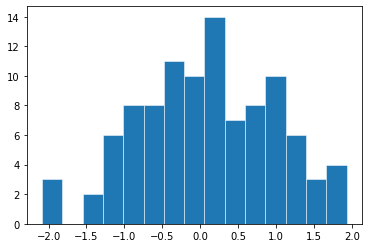

In [22]:

fig, ax = plt.subplots()

ax.hist(corlist, bins=15, linewidth=0.5, edgecolor="white")

plt.show()